# Analyzing U.S. Wildfires
---

## Data Exploration

### Questions to Answer:
#### 1. What locations are the most and least fire-prone? 
- Look at number of occurrences of fire by location
 - Also view this in relation to size of state -- of course bigger states would have more fires than smaller ones
- Make geographic plots
- Since there is so much data, it may be a good idea to focus on a single location at a time
 - Texas could be a good focus since that's where Codeup is located

#### 2. How does fire size vary by location?
- Look at fire_size by location

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wrangle import wrangle_fires

In [2]:
# wrangle data
fires = wrangle_fires()
fires.head()

/opt/homebrew/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,25,26,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state
0,2005,2005-02-02,Power generation/transmission/distribution,2005-02-02,0.10,40.036944,-121.005833,CA
1,2004,2004-05-12,Natural,2004-05-12,0.25,38.933056,-120.404444,CA
2,2004,2004-05-31,Debris and open burning,2004-05-31,0.10,38.984167,-120.735556,CA
3,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.913333,CA
4,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.933056,CA


In [30]:
# view shape of dataframe
fires.shape

(2166753, 8)

In [3]:
# ignore pink warnings
import warnings
warnings.filterwarnings('ignore')

#### What is the size range for fires in this dataset?

In [4]:
# view range of fire size
fires.fire_size.min(), fires.fire_size.max()

(1e-05, 662700.0)

In [5]:
# view states included in dataset
fires.state.value_counts()

CA    235229
GA    180175
TX    167061
NC    123793
FL     99356
AZ     93417
NY     93171
SC     86021
MS     83106
AL     72482
OR     67157
CO     61226
MN     48679
OK     48140
MT     47262
NM     41193
ID     40154
WA     37789
AR     36678
WI     35316
SD     34781
UT     34328
TN     33611
LA     32243
NJ     30553
KY     29610
VA     23747
WV     23731
PR     22159
MO     21998
NV     18874
ND     18308
WY     17535
KS     17473
ME     14924
MI     14166
AK     14125
PA     10803
NE     10354
HI      9949
MA      6778
CT      6006
IA      5094
OH      4727
MD      3947
NH      2935
IL      2814
IN      2206
VT       671
RI       631
DE       187
DC        80
Name: state, dtype: int64

There is wildfire data for all 50 US states as well as Puerto Rico and Washington, DC.

CA, GA, TX, NC, FL have the highest occurrences of wildfires from 1992-2018.

Since there is so much data to go through, I'll start by investigating the fires located in Texas.

In the graph below, I want to show differences in fires based on both time and size. I was able to show the year differences fairly well but I'll need to use a different method for showing size. One way to accomplish this may be to bin the size values into categories so it'll be easier for seaborn to represent those differences visually considering how many data points it needs to plot. I'll do this on my next run-through to give myself a break from staring at this plot. For now, I'll move onto some other exploration.

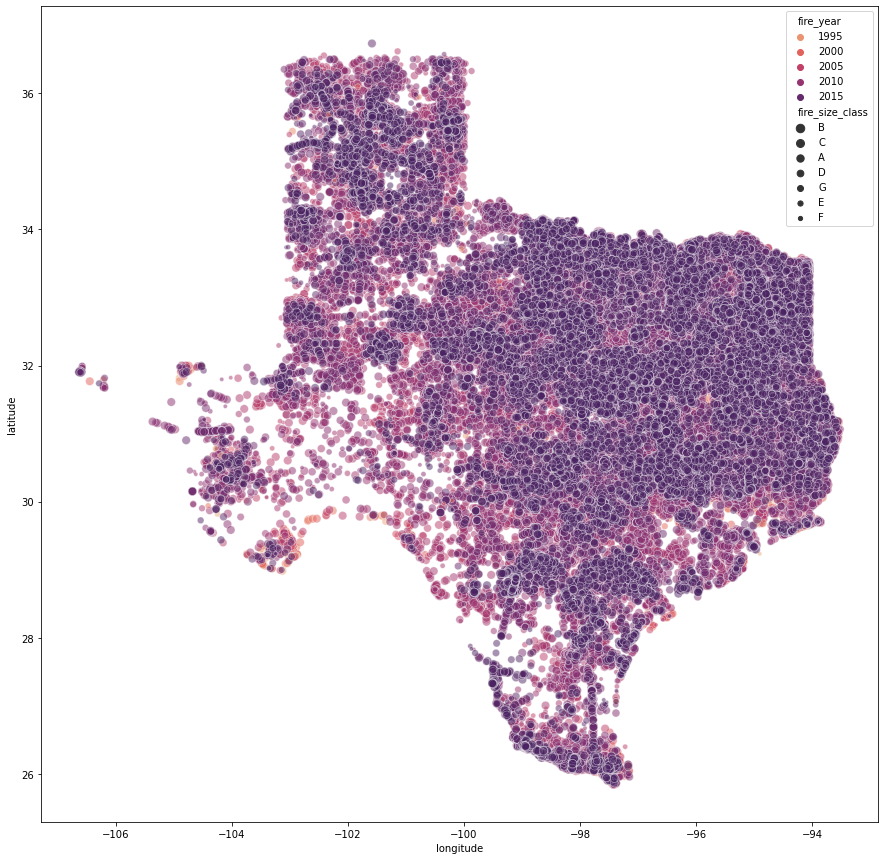

In [133]:
# plot fires in Texas
plt.figure(figsize=(15,15))
sns.scatterplot(x='longitude', y='latitude', data=fires[fires.state=='TX'], size='fire_size_class', hue='fire_year', palette='flare', alpha=0.5);
# light to dark, oldest to newest

In [7]:
# isolate texas fires into separate dataframe
tx_fires = fires[fires.state=='TX']
tx_fires.head()

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state
283,2005,2005-01-24,Arson/incendiarism,2005-01-24,3.0,33.786111,-96.150000,TX
284,2005,2005-01-25,Debris and open burning,2005-01-25,55.0,31.312500,-94.270833,TX
285,2005,2005-03-12,Recreation and ceremony,2005-03-13,2.0,33.345833,-97.595833,TX
286,2005,2005-04-03,Smoking,2005-04-03,0.3,31.386667,-95.150556,TX
287,2005,2005-04-07,Natural,2005-04-08,55.0,31.354167,-95.085278,TX


In [8]:
# view shape of subset df
tx_fires.shape

(167061, 8)

In [9]:
# view timeframe of texas fires
tx_fires.fire_year.min(), tx_fires.fire_year.max()

(1992, 2018)

In [10]:
# check for nulls in tx data
tx_fires.isna().sum()

fire_year                0
discovery_date           0
general_cause            0
containment_date    139043
fire_size                0
latitude                 0
longitude                0
state                    0
dtype: int64

In [11]:
# remove rows with null cont_date
tx_fires = tx_fires[tx_fires.containment_date.notnull()]
tx_fires

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state
283,2005,2005-01-24,Arson/incendiarism,2005-01-24,3.00,33.786111,-96.150000,TX
284,2005,2005-01-25,Debris and open burning,2005-01-25,55.00,31.312500,-94.270833,TX
285,2005,2005-03-12,Recreation and ceremony,2005-03-13,2.00,33.345833,-97.595833,TX
286,2005,2005-04-03,Smoking,2005-04-03,0.30,31.386667,-95.150556,TX
287,2005,2005-04-07,Natural,2005-04-08,55.00,31.354167,-95.085278,TX
...,...,...,...,...,...,...,...,...
2108929,2018,2018-11-29,Missing data/not specified/undetermined,2018-11-29,31.21,33.422500,-101.959667,TX
2108979,2018,2018-12-05,Missing data/not specified/undetermined,2018-12-05,50.00,30.014200,-94.805183,TX
2109052,2018,2018-12-14,Missing data/not specified/undetermined,2018-12-16,1400.00,27.837783,-99.872783,TX
2109106,2018,2018-12-21,Missing data/not specified/undetermined,2018-12-21,8.00,33.085200,-96.155500,TX


I'm interested in seeing how long these fires burned/were considered to be uncontained, so to look into this I'll create a new column using discovery_date and cont_date.

In [12]:
# create new column
tx_fires['days_uncontrolled'] = tx_fires.containment_date-tx_fires.discovery_date
tx_fires

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state,days_uncontrolled
283,2005,2005-01-24,Arson/incendiarism,2005-01-24,3.00,33.786111,-96.150000,TX,0 days
284,2005,2005-01-25,Debris and open burning,2005-01-25,55.00,31.312500,-94.270833,TX,0 days
285,2005,2005-03-12,Recreation and ceremony,2005-03-13,2.00,33.345833,-97.595833,TX,1 days
286,2005,2005-04-03,Smoking,2005-04-03,0.30,31.386667,-95.150556,TX,0 days
287,2005,2005-04-07,Natural,2005-04-08,55.00,31.354167,-95.085278,TX,1 days
...,...,...,...,...,...,...,...,...,...
2108929,2018,2018-11-29,Missing data/not specified/undetermined,2018-11-29,31.21,33.422500,-101.959667,TX,0 days
2108979,2018,2018-12-05,Missing data/not specified/undetermined,2018-12-05,50.00,30.014200,-94.805183,TX,0 days
2109052,2018,2018-12-14,Missing data/not specified/undetermined,2018-12-16,1400.00,27.837783,-99.872783,TX,2 days
2109106,2018,2018-12-21,Missing data/not specified/undetermined,2018-12-21,8.00,33.085200,-96.155500,TX,0 days


In [13]:
# look at value counts for uncontrolled windows
tx_fires.days_uncontrolled.value_counts().sort_index()

0 days      23623
1 days       2905
2 days        657
3 days        289
4 days        131
5 days         96
6 days         56
7 days         47
8 days         25
9 days         23
10 days        26
11 days        12
12 days        12
13 days        15
14 days        12
15 days         5
16 days         5
17 days         3
18 days         1
19 days         5
20 days         5
21 days         1
22 days         1
23 days         1
24 days         1
25 days         2
26 days         5
27 days         1
28 days         2
29 days         3
30 days         6
31 days         9
32 days         3
33 days         2
34 days         1
35 days         1
36 days         1
37 days         1
39 days         1
45 days         1
48 days         2
59 days         1
120 days        1
133 days        1
178 days        1
244 days        1
365 days       13
366 days        1
371 days        1
Name: days_uncontrolled, dtype: int64

In [14]:
# longest uncontrolled fire in Texas
tx_fires[tx_fires.days_uncontrolled == '371 days']

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state,days_uncontrolled
598747,2000,2000-09-12,Missing data/not specified/undetermined,2001-09-18,80.0,31.49792,-94.98125,TX,371 days


Lori's fantastic suggestion: In the slides be sure to have a reference for how big something is (football field, two schoolbuses, etc.)

In [15]:
# recreate df for all tx fires
all_tx_fires = fires[fires.state=='TX']
all_tx_fires

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state
283,2005,2005-01-24,Arson/incendiarism,2005-01-24,3.0,33.786111,-96.150000,TX
284,2005,2005-01-25,Debris and open burning,2005-01-25,55.0,31.312500,-94.270833,TX
285,2005,2005-03-12,Recreation and ceremony,2005-03-13,2.0,33.345833,-97.595833,TX
286,2005,2005-04-03,Smoking,2005-04-03,0.3,31.386667,-95.150556,TX
287,2005,2005-04-07,Natural,2005-04-08,55.0,31.354167,-95.085278,TX
...,...,...,...,...,...,...,...,...
2118712,2018,2018-01-22,Missing data/not specified/undetermined,NaT,2153.0,32.725283,-97.558050,TX
2118713,2018,2018-01-22,Missing data/not specified/undetermined,NaT,585.0,33.899167,-98.848833,TX
2118743,2018,2018-03-18,Missing data/not specified/undetermined,NaT,400.0,31.580000,-102.947222,TX
2118744,2018,2018-05-09,Missing data/not specified/undetermined,NaT,1000.0,34.760175,-101.246832,TX


In [16]:
# resample by year's total fires
tx_fires_y = all_tx_fires.resample('Y', on='discovery_date').count()
tx_fires_y.shape

(27, 8)

---

### Exploring Beyond Texas

Below is a scatterplot of all the fires in our dataset.

There appear to be certain areas where fires have not occurred in more recent years. Looking at the areas to the northeast of Texas, there is a cluster of lighter colored points indicating there is an abundance of fires dating further back. There are a few other areas with similar characteristics.

Additionally, there seem to be fewer fires in the Ohio area as the datapoints are sparse in tht region. Unsure if this is simply due to a lack of information for that area, an anomaly in the scatterplot, or if there are truly fewer fires in that area. This will need further exploration.

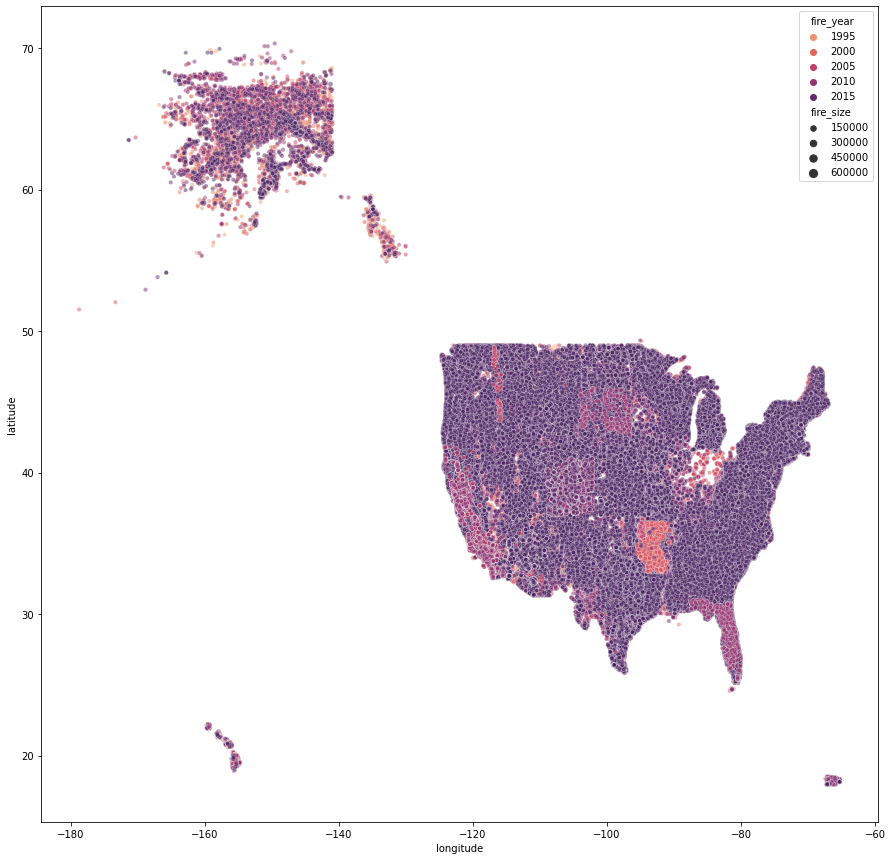

In [135]:
# plot fires across us
plt.figure(figsize=(15,15))
sns.scatterplot(x='longitude', y='latitude', data=fires, size='fire_size', hue='fire_year', palette='flare', alpha=0.5);

Next I want to look at data by state. I'll be looking into fire size as well as the number of wildfires in each state.

[Text(0.5, 1.0, 'Number of Fires by State')]

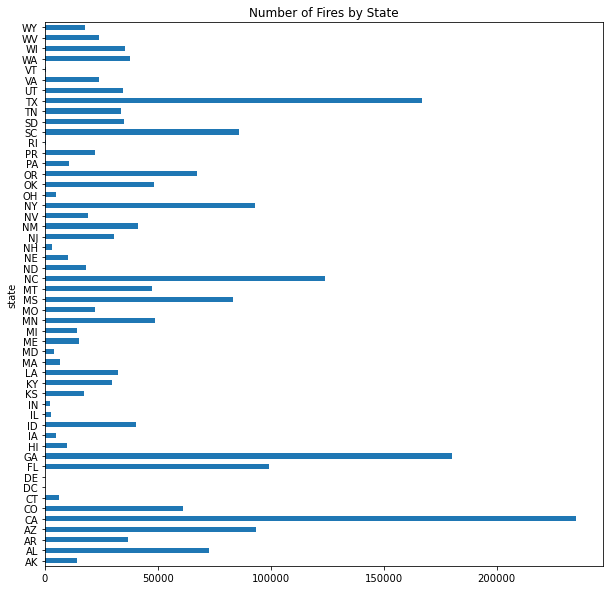

In [52]:
# view overall mean fire size by state
plt.figure(figsize=(10,10))
fires.groupby('state').fire_size.count().plot.barh().set(title='Number of Fires by State')

Above is a visualization of the number of wildfires in each state during the full span of our dataset (1992-2018). The top 3 states are California, Georgia, then Texas.

I also want to look at this data for each individual year.

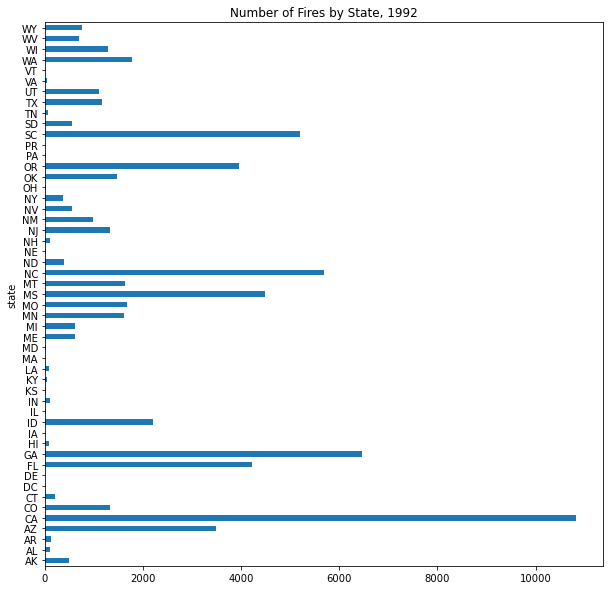

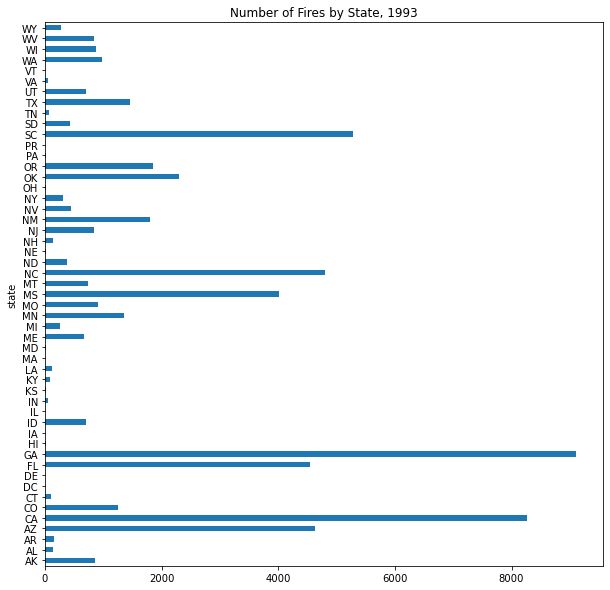

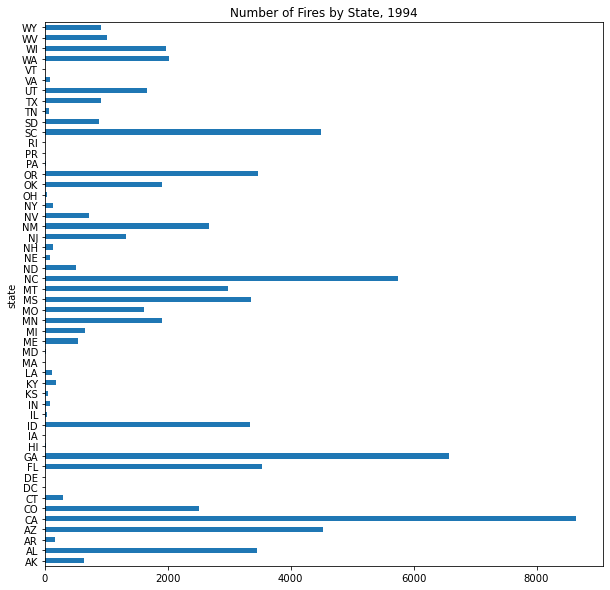

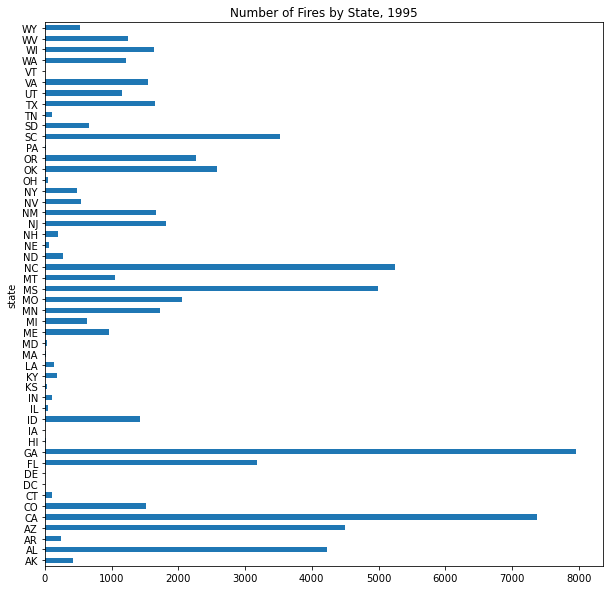

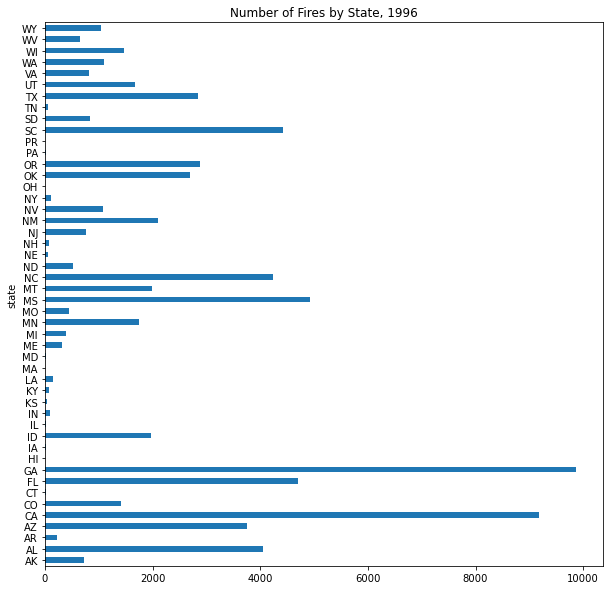

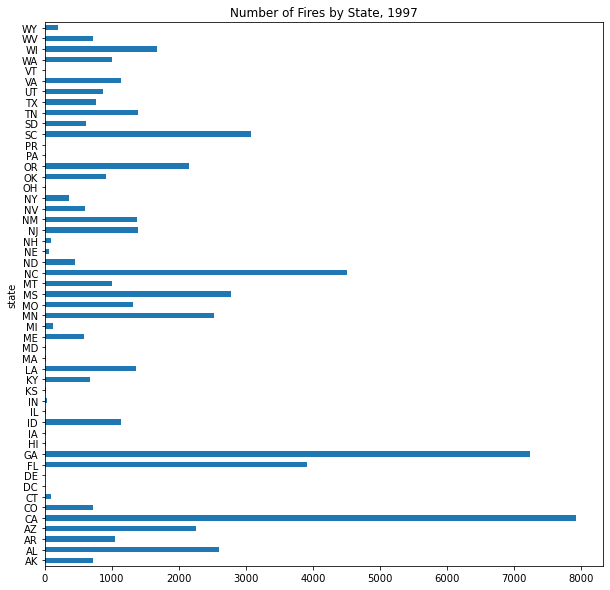

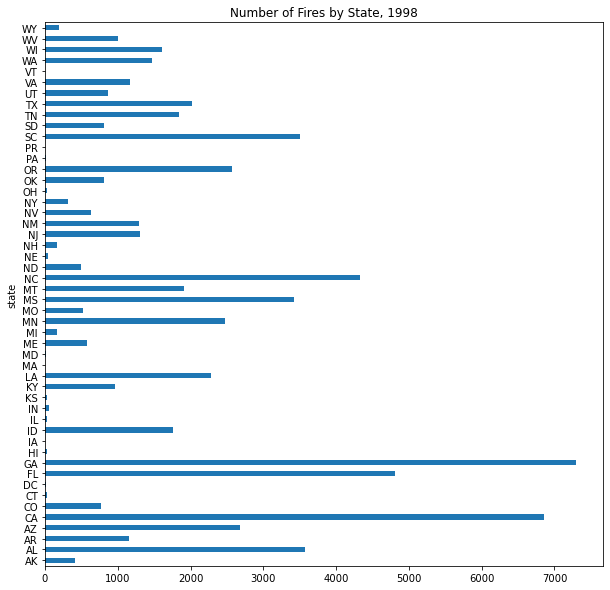

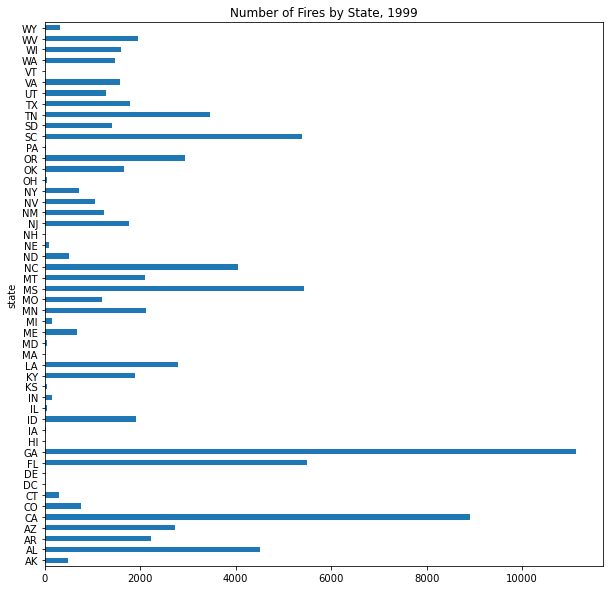

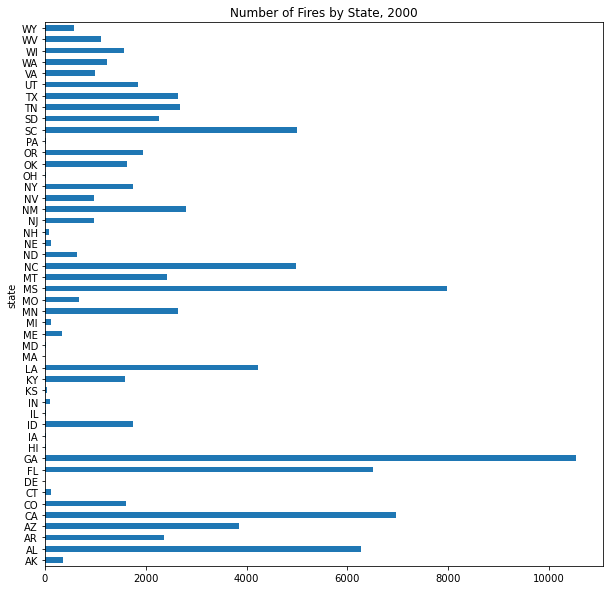

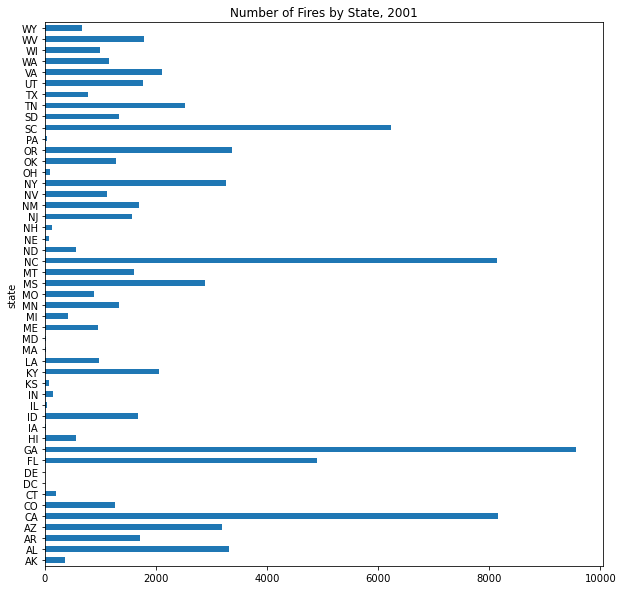

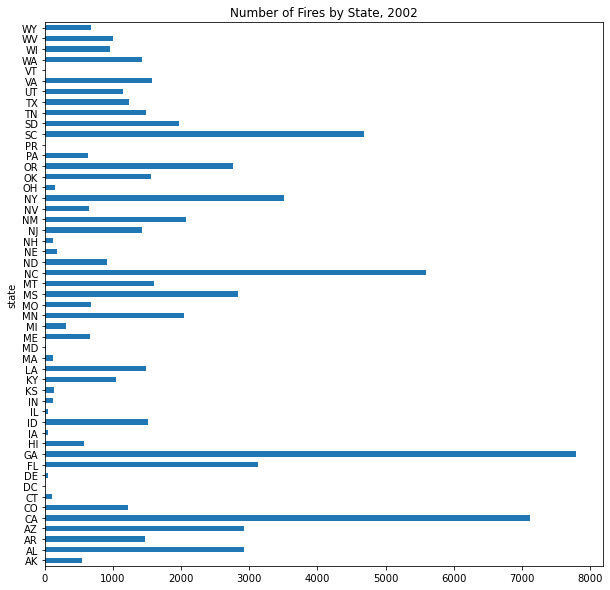

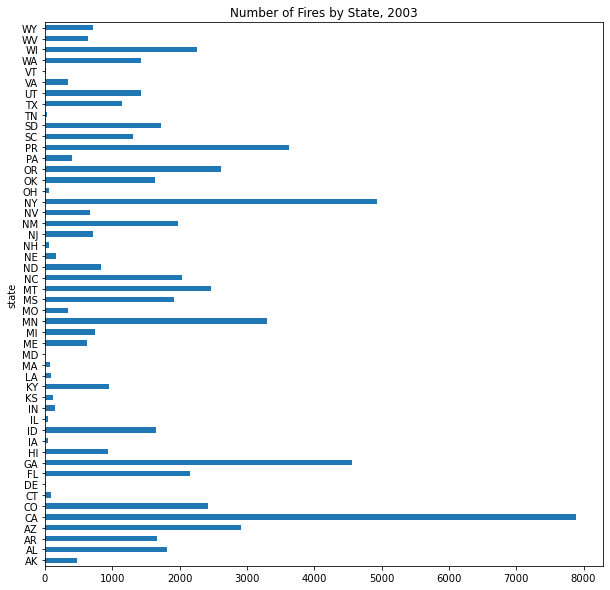

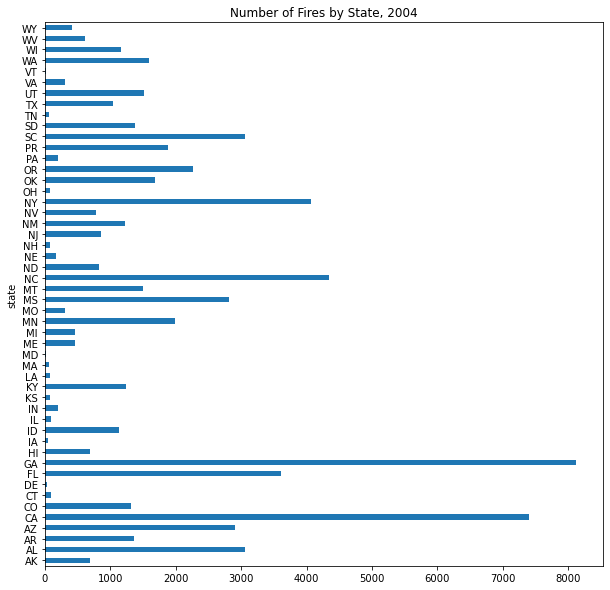

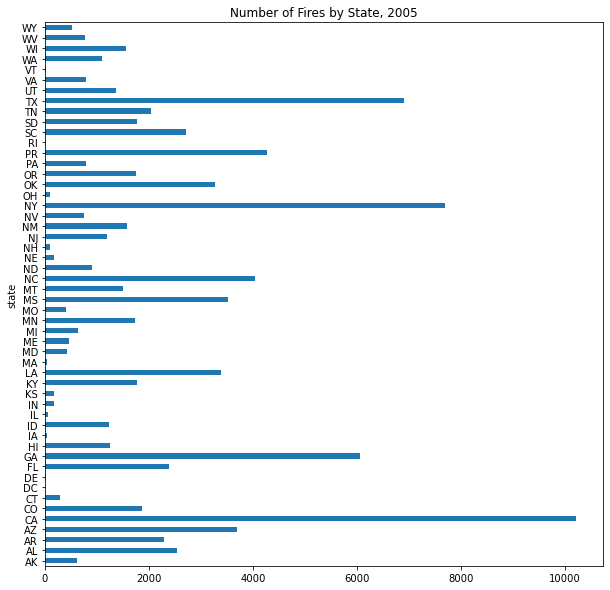

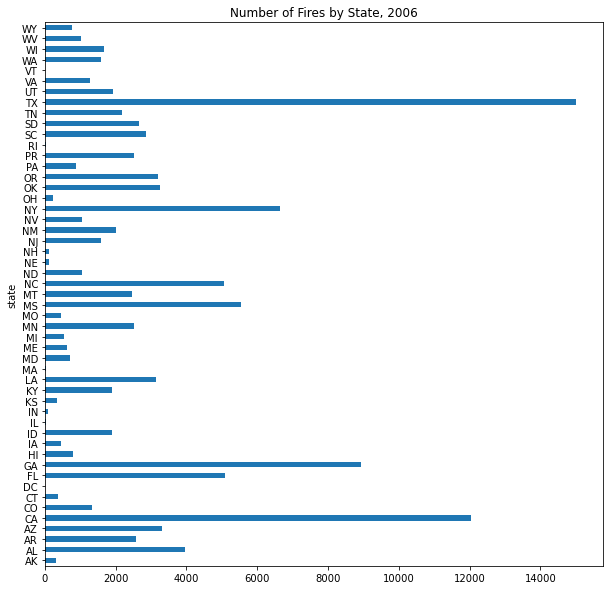

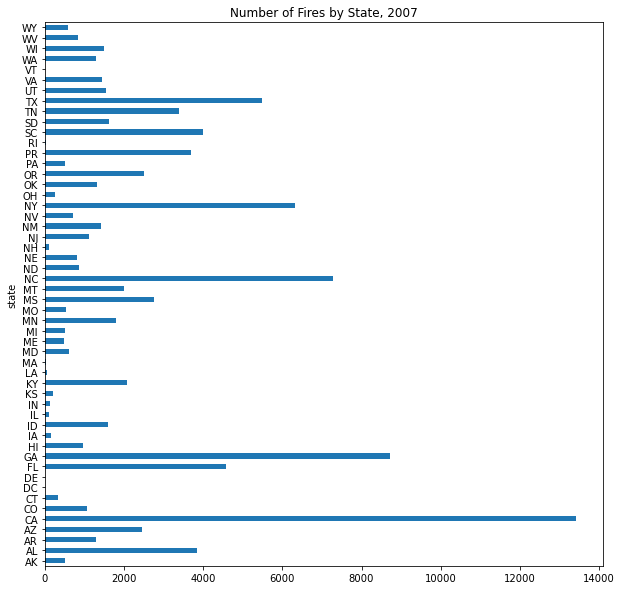

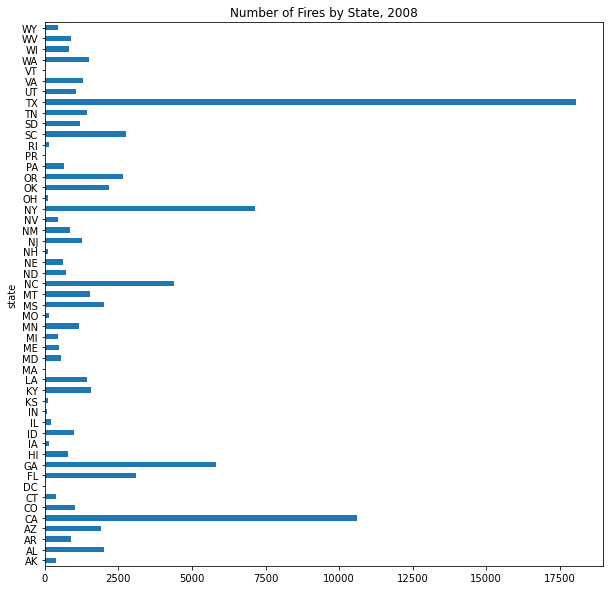

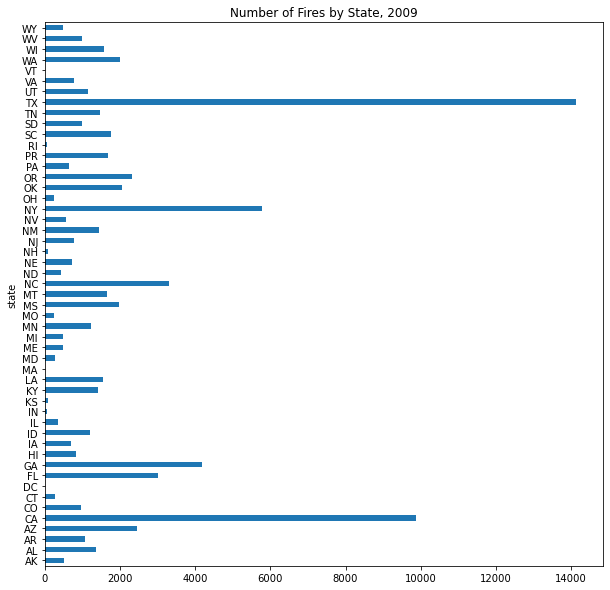

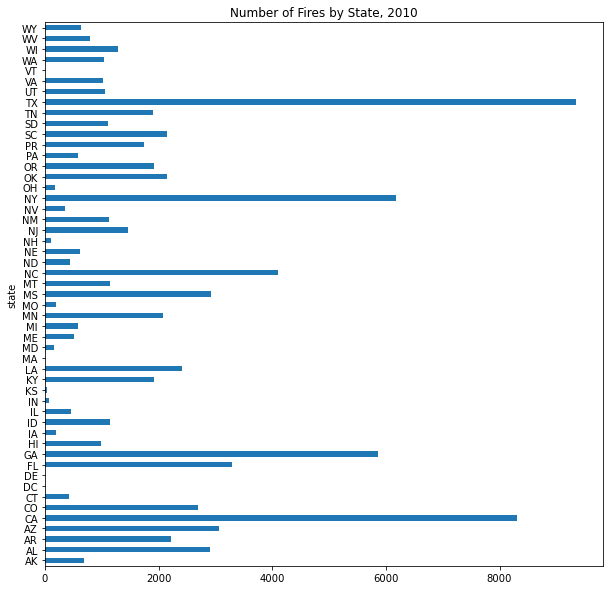

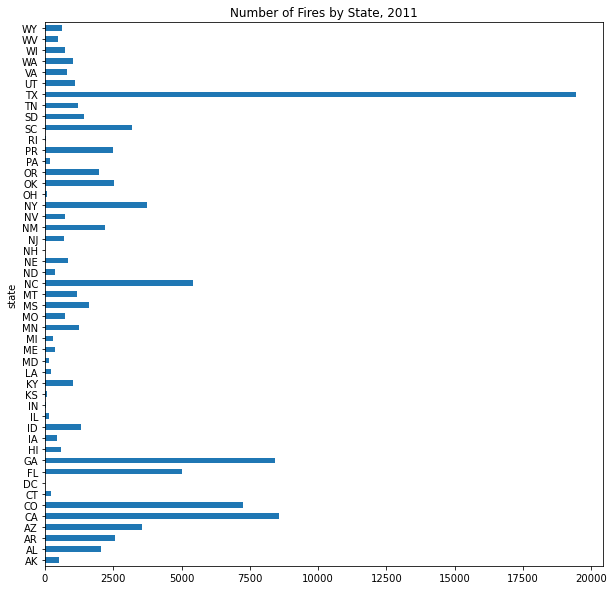

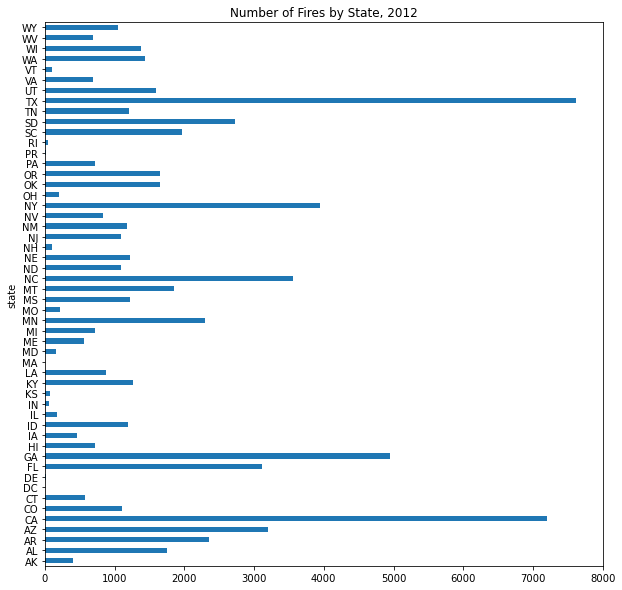

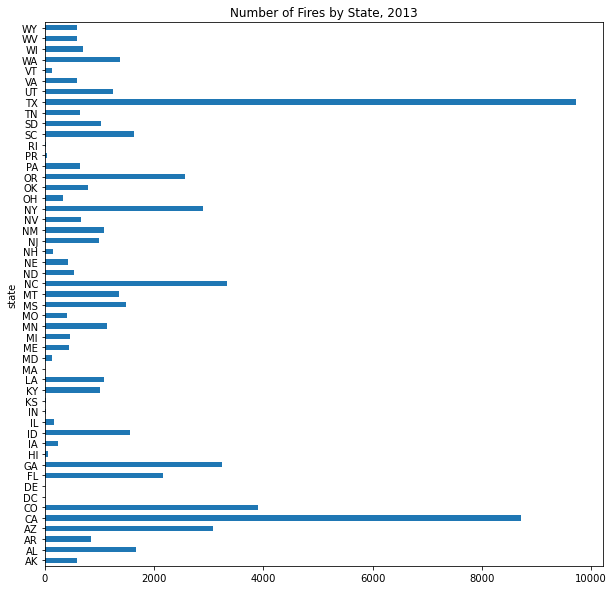

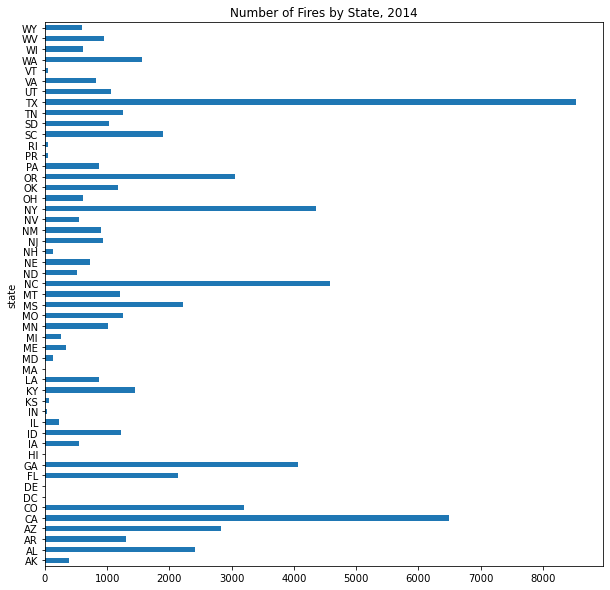

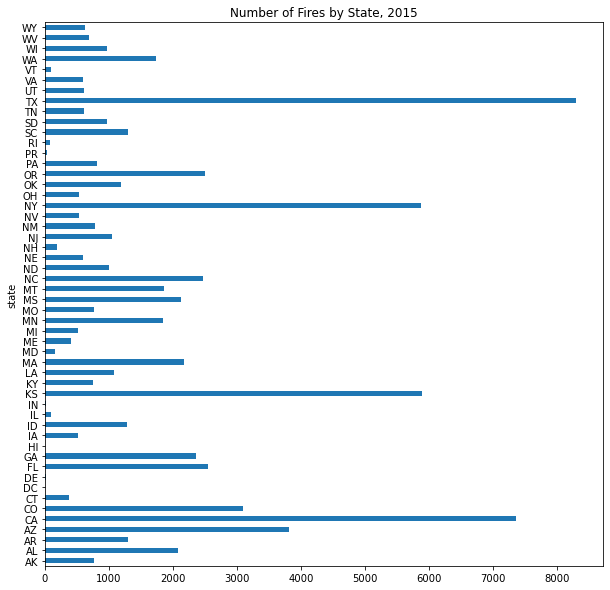

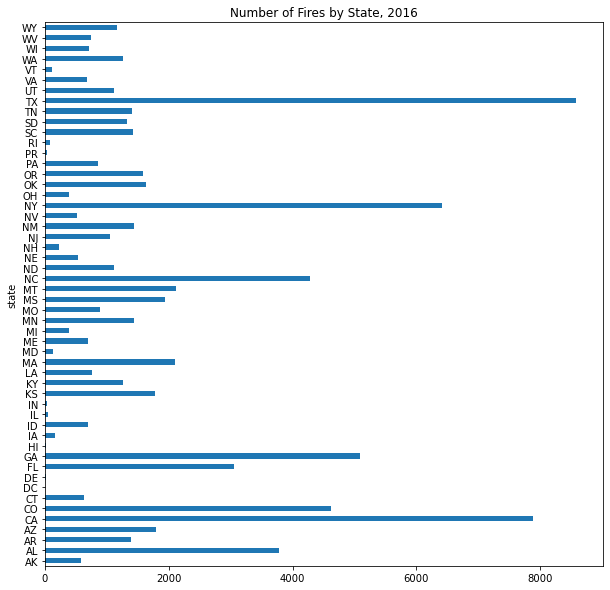

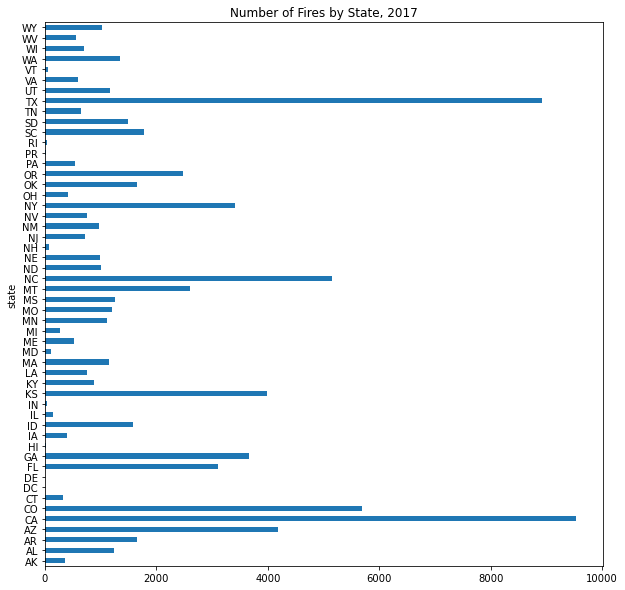

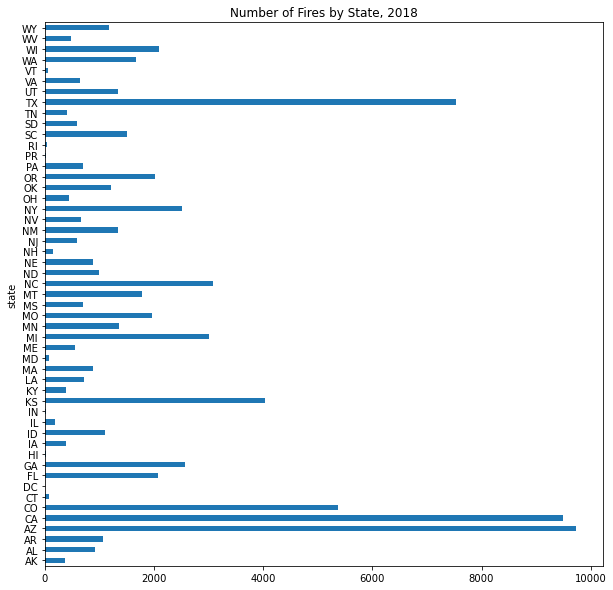

In [53]:
# plot num fires per year
for year in list(range(1992,2019)):
    plt.figure(figsize=(10,10))
    fires[fires.fire_year == year].groupby('state').fire_size.count().plot.barh().set(title=f'Number of Fires by State, {year}')
    plt.show();

In [74]:
# print max and min for num fires/year
for year in list(range(1992, 2019)):
    print(year)
    print('Fewest fires:',fires[fires.fire_year == year].groupby('state').fire_size.count().idxmin(3), fires[fires.fire_year == year].groupby('state').fire_size.count().min())
    print('Most fires:',fires[fires.fire_year == year].groupby('state').fire_size.count().idxmax(), fires[fires.fire_year == year].groupby('state').fire_size.count().max())
    print()

1992
Fewest fires: VT 1
Most fires: CA 10831

1993
Fewest fires: DE 1
Most fires: GA 9111

1994
Fewest fires: MA 1
Most fires: CA 8649

1995
Fewest fires: VT 2
Most fires: GA 7966

1996
Fewest fires: PR 3
Most fires: GA 9872

1997
Fewest fires: VT 2
Most fires: CA 7928

1998
Fewest fires: MA 1
Most fires: GA 7301

1999
Fewest fires: DE 2
Most fires: GA 11138

2000
Fewest fires: DE 1
Most fires: GA 10545

2001
Fewest fires: DC 1
Most fires: GA 9568

2002
Fewest fires: DC 1
Most fires: GA 7801

2003
Fewest fires: MD 5
Most fires: CA 7894

2004
Fewest fires: VT 16
Most fires: GA 8127

2005
Fewest fires: DC 2
Most fires: CA 10219

2006
Fewest fires: DC 3
Most fires: TX 15019

2007
Fewest fires: DC 1
Most fires: CA 13428

2008
Fewest fires: DC 1
Most fires: TX 18068

2009
Fewest fires: DC 1
Most fires: TX 14142

2010
Fewest fires: DC 1
Most fires: TX 9353

2011
Fewest fires: DC 2
Most fires: TX 19451

2012
Fewest fires: DC 5
Most fires: TX 7623

2013
Fewest fires: DC 1
Most fires: TX 9734



To be able to compare wildfire destruction in relation to the size of the state in which the wildfire occurred, I need to know how big each state/territory is so I can determine the proportion of the fire size to state/territory size. To get this, I used publicly available information from the US Forest Service located at this webpage: https://www.fs.usda.gov/Internet/FSE_DOCUMENTS/fsm8_037652.htm

In [27]:
# pull in state size data
states = pd.read_csv('state_acres.csv', index_col=0)
states.rename(columns={'State Acres':'state_size'}, inplace=True)
states

,state_size
State 1,
AL,"33,432,000"
AK,"393,747,000"
AZ,"72,964,000"
AR,"34,036,000"
CA,"101,676,000"
CO,"66,624,000"
CT,"3,548,000"
DE,"1,534,000"
DC,39000


In [32]:
# add state size onto fires dataframe
fires1 = pd.merge(fires, states, left_on=fires.state, right_index=True).drop(columns='key_0')
fires1

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state,state_size
0,2005,2005-02-02,Power generation/transmission/distribution,2005-02-02,0.10,40.036944,-121.005833,CA,"101,676,000"
1,2004,2004-05-12,Natural,2004-05-12,0.25,38.933056,-120.404444,CA,"101,676,000"
2,2004,2004-05-31,Debris and open burning,2004-05-31,0.10,38.984167,-120.735556,CA,"101,676,000"
3,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.913333,CA,"101,676,000"
4,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.933056,CA,"101,676,000"
...,...,...,...,...,...,...,...,...,...
2103194,2018,2018-05-12,Missing data/not specified/undetermined,2018-05-12,0.10,41.878960,-71.523120,RI,788000
2104429,2018,2018-06-14,Missing data/not specified/undetermined,2018-06-14,0.10,41.869240,-71.350730,RI,788000
2104735,2018,2018-06-22,Missing data/not specified/undetermined,2018-06-22,0.10,41.442440,-71.748940,RI,788000
2105722,2018,2018-07-11,Missing data/not specified/undetermined,2018-07-11,0.10,41.679750,-71.543760,RI,788000


In [79]:
# add cleaned state size column to fires df
fires['state_size'] = fires1.state_size.str.replace(',','')
fires

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state,state_size
0,2005,2005-02-02,Power generation/transmission/distribution,2005-02-02,0.10,40.036944,-121.005833,CA,101676000
1,2004,2004-05-12,Natural,2004-05-12,0.25,38.933056,-120.404444,CA,101676000
2,2004,2004-05-31,Debris and open burning,2004-05-31,0.10,38.984167,-120.735556,CA,101676000
3,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.913333,CA,101676000
4,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.933056,CA,101676000
...,...,...,...,...,...,...,...,...,...
2166748,2016,2016-10-18,Missing data/not specified/undetermined,NaT,125.00,36.431667,-84.421667,TN,26973000
2166749,2016,2016-10-22,Missing data/not specified/undetermined,NaT,120.00,31.143611,-88.111944,AL,33432000
2166750,2017,2017-04-02,Missing data/not specified/undetermined,NaT,120.00,33.920000,-85.310000,AL,33432000
2166751,2017,2017-11-30,Missing data/not specified/undetermined,NaT,110.00,34.640000,-93.400000,AR,34036000


In [81]:
# change state size dtype to float
fires = fires.astype({'state_size':'float64'})
fires.dtypes

fire_year                    int64
discovery_date      datetime64[ns]
general_cause               object
containment_date    datetime64[ns]
fire_size                  float64
latitude                   float64
longitude                  float64
state                       object
state_size                 float64
dtype: object

In [104]:
# calculate percent of state burned by each fire
fires['pct_state_burned'] = (fires.fire_size/fires.state_size)*100
fires

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,pct_state_burned
0,2005,2005-02-02,Power generation/transmission/distribution,2005-02-02,0.10,40.036944,-121.005833,CA,101676000.0,9.835000e-08
1,2004,2004-05-12,Natural,2004-05-12,0.25,38.933056,-120.404444,CA,101676000.0,2.458800e-07
2,2004,2004-05-31,Debris and open burning,2004-05-31,0.10,38.984167,-120.735556,CA,101676000.0,9.835000e-08
3,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.913333,CA,101676000.0,9.835000e-08
4,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.933056,CA,101676000.0,9.835000e-08
...,...,...,...,...,...,...,...,...,...,...
2166748,2016,2016-10-18,Missing data/not specified/undetermined,NaT,125.00,36.431667,-84.421667,TN,26973000.0,4.634264e-04
2166749,2016,2016-10-22,Missing data/not specified/undetermined,NaT,120.00,31.143611,-88.111944,AL,33432000.0,3.589375e-04
2166750,2017,2017-04-02,Missing data/not specified/undetermined,NaT,120.00,33.920000,-85.310000,AL,33432000.0,3.589375e-04
2166751,2017,2017-11-30,Missing data/not specified/undetermined,NaT,110.00,34.640000,-93.400000,AR,34036000.0,3.231872e-04


In [105]:
# view range for percent of state burned
fires.pct_state_burned.min(), fires.pct_state_burned.max()

(2e-11, 1.48129107247)

In [89]:
# view fire with highest pct_state_burned
fires[fires.pct_state_burned == fires.pct_state_burned.max()]

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,pct_state_burned
2042982,2017,2017-03-07,Missing data/not specified/undetermined,NaT,662700.0,36.77447,-100.1752,OK,44738000.0,1.481291


So it looks like the fire that burned the largest portion of a state is also the biggest fire in our dataset. However, I do know that this fire spanned more than just Oklahoma and burned into Kansas so this column may not be truly representative in cases like this where a fire spans multiple states.

In [103]:
# check dtypes
fires.dtypes

fire_year                    int64
discovery_date      datetime64[ns]
general_cause               object
containment_date    datetime64[ns]
fire_size                  float64
latitude                   float64
longitude                  float64
state                       object
state_size                 float64
pct_state_burned            object
dtype: object

[Text(0.5, 1.0, 'Mean Fire Size by State'), Text(0.5, 0, 'acres')]

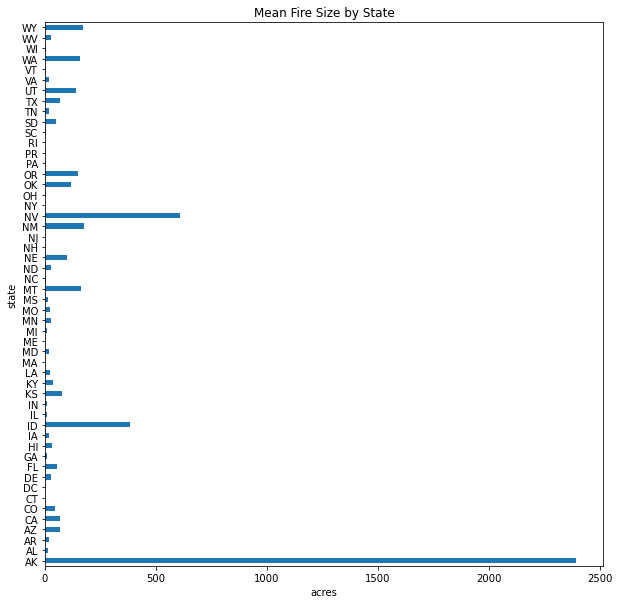

In [43]:
# view overall mean fire size by state
plt.figure(figsize=(10,10))
fires.groupby('state').fire_size.mean().plot.barh().set(title='Mean Fire Size by State', xlabel='acres')

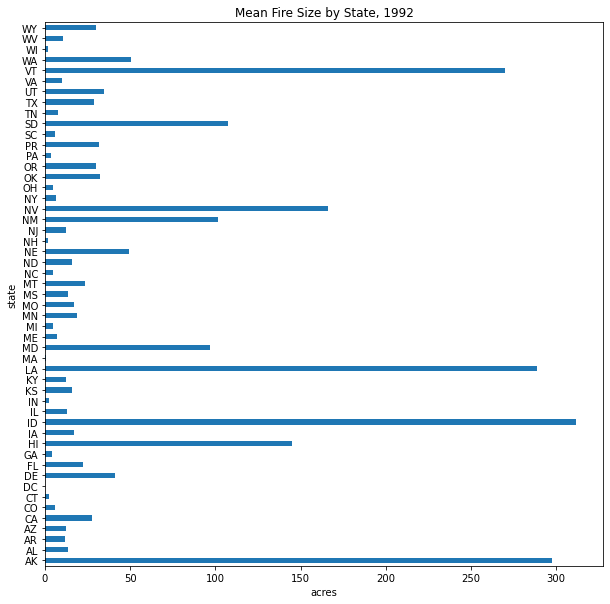

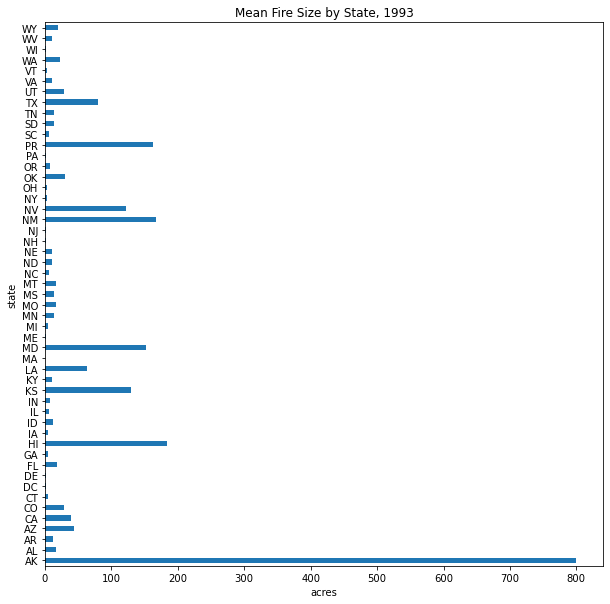

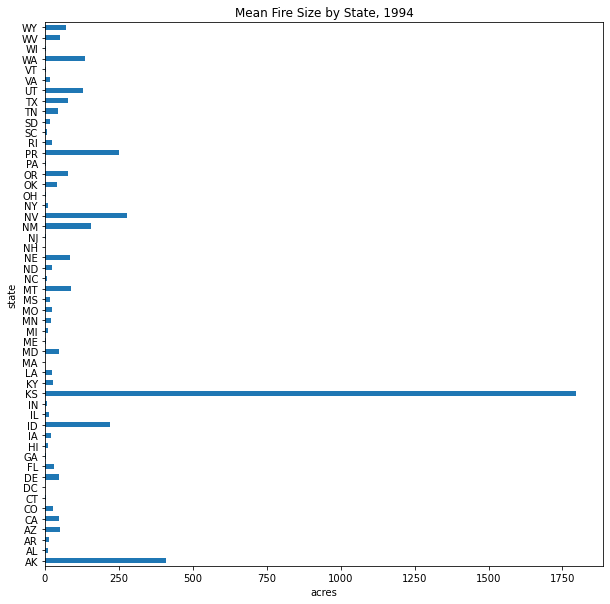

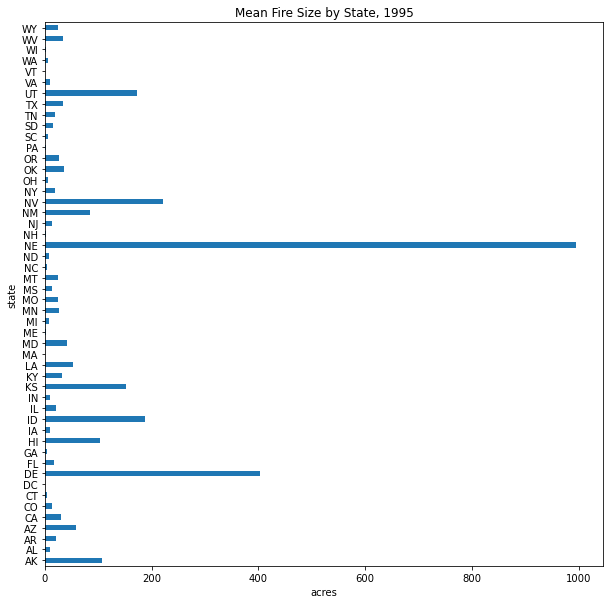

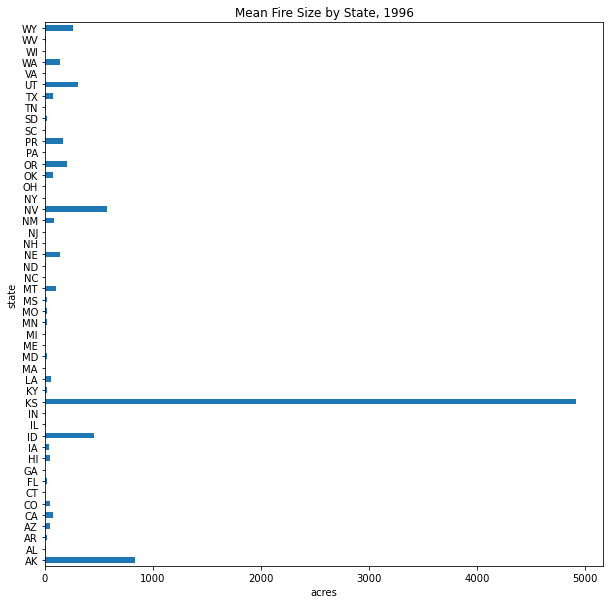

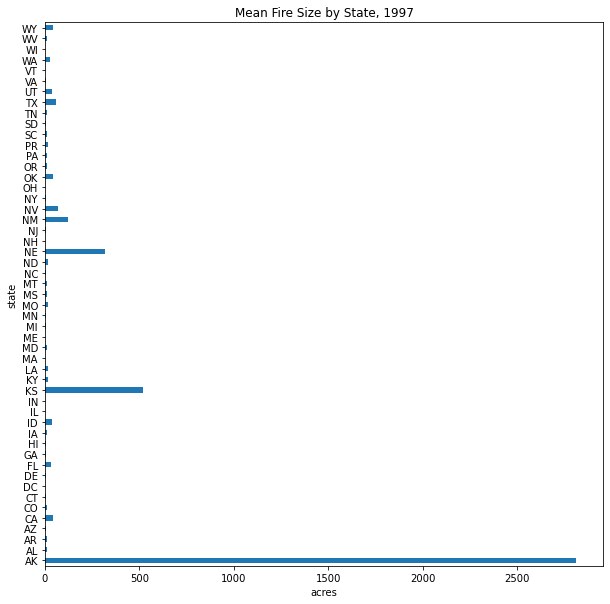

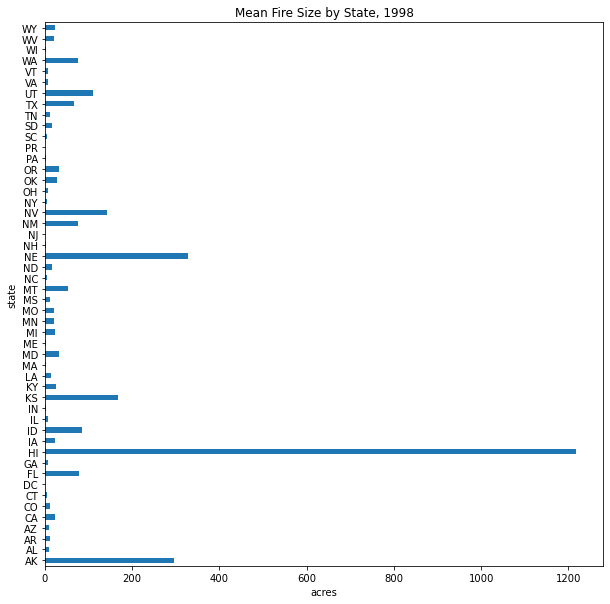

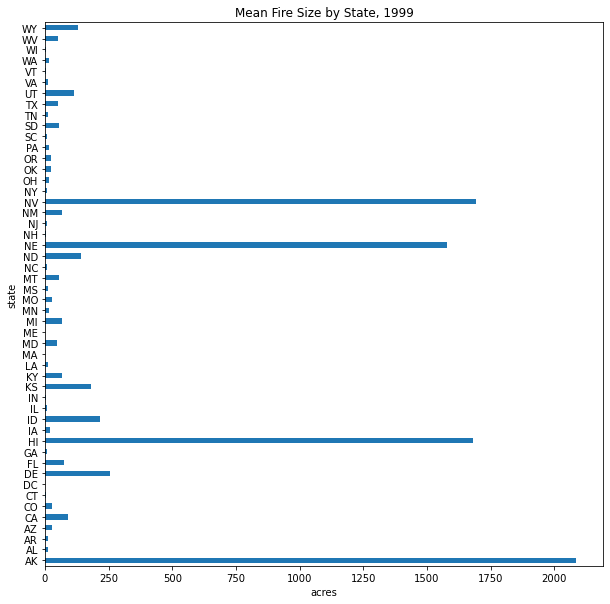

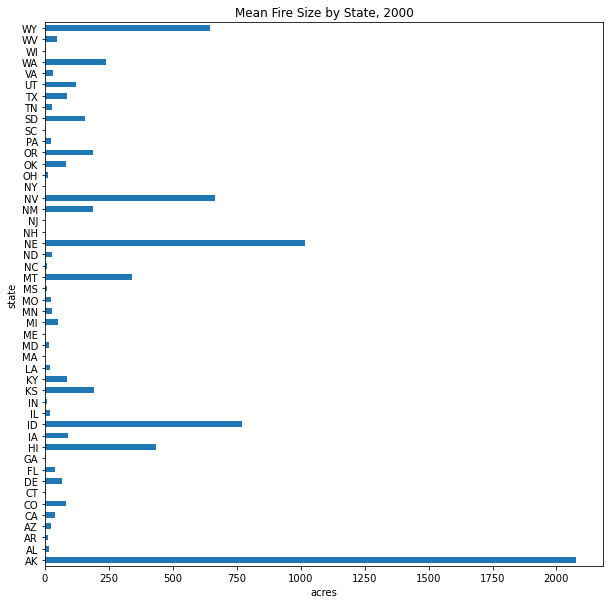

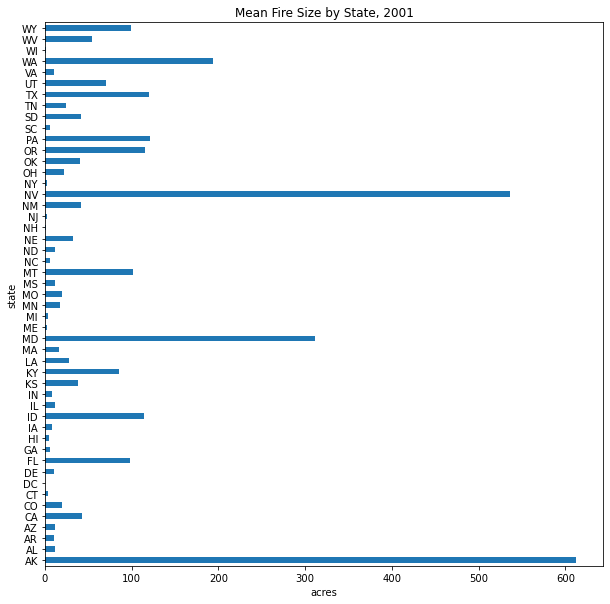

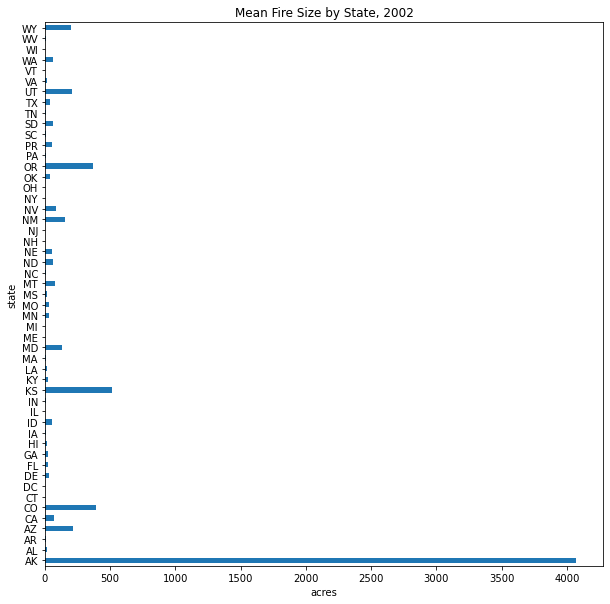

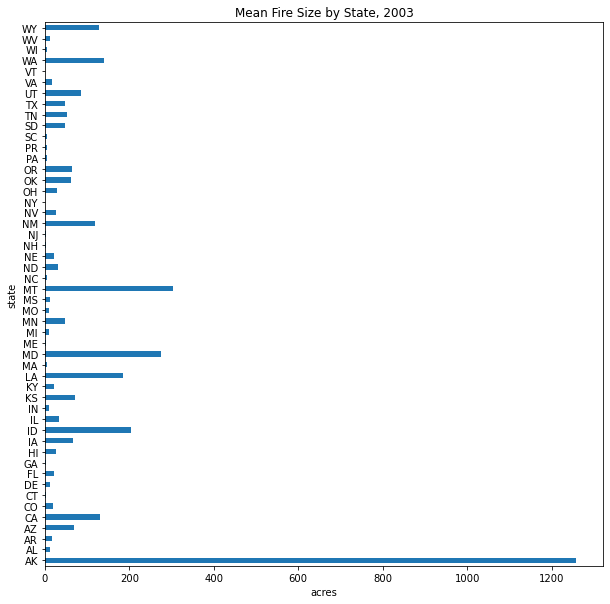

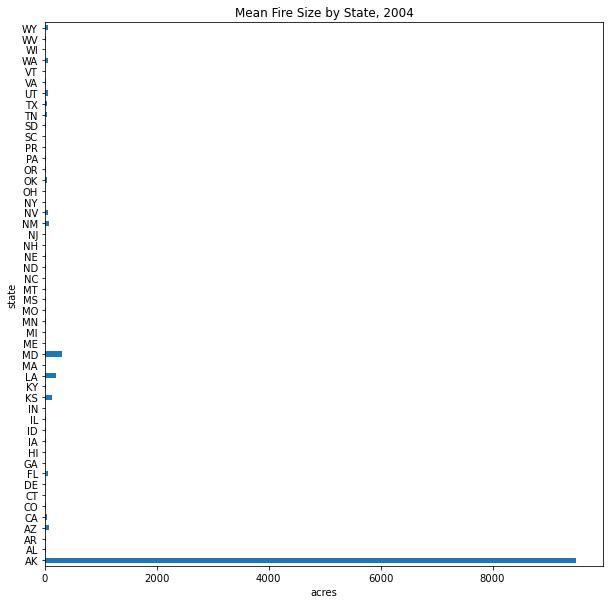

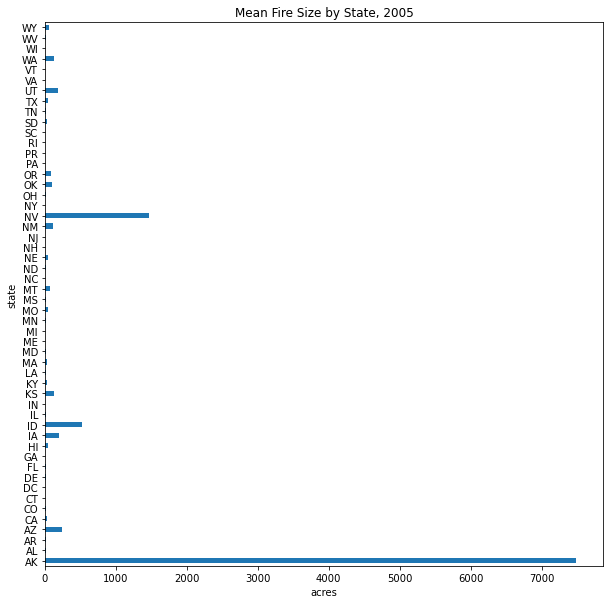

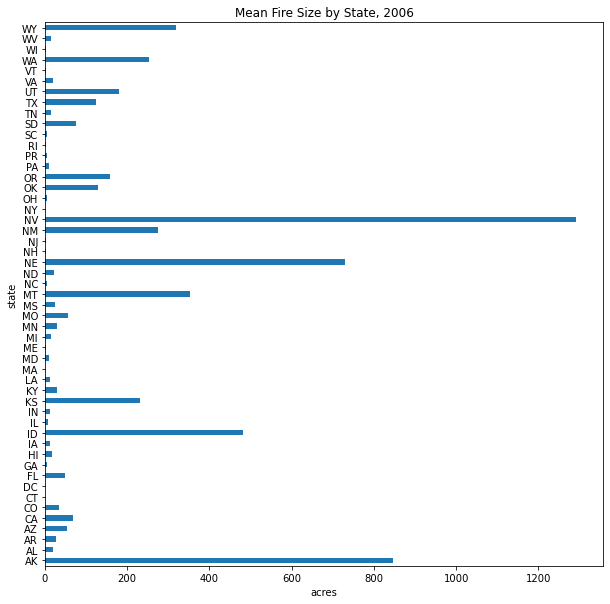

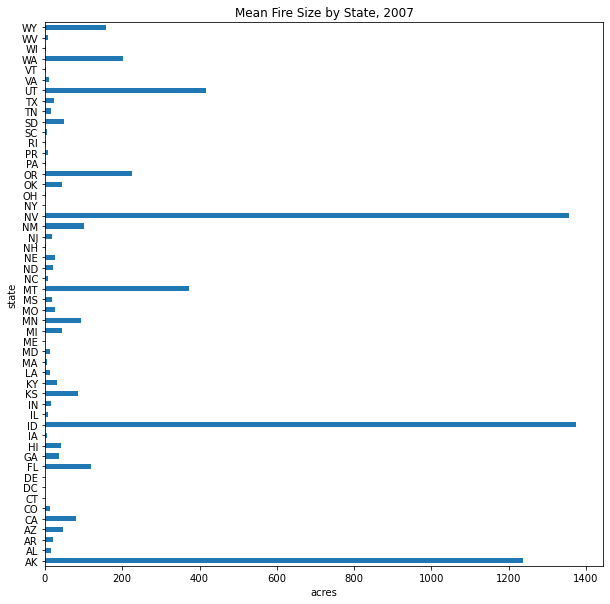

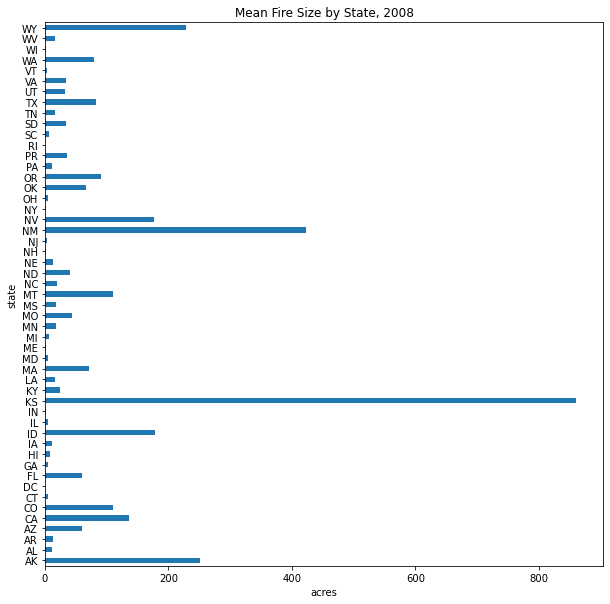

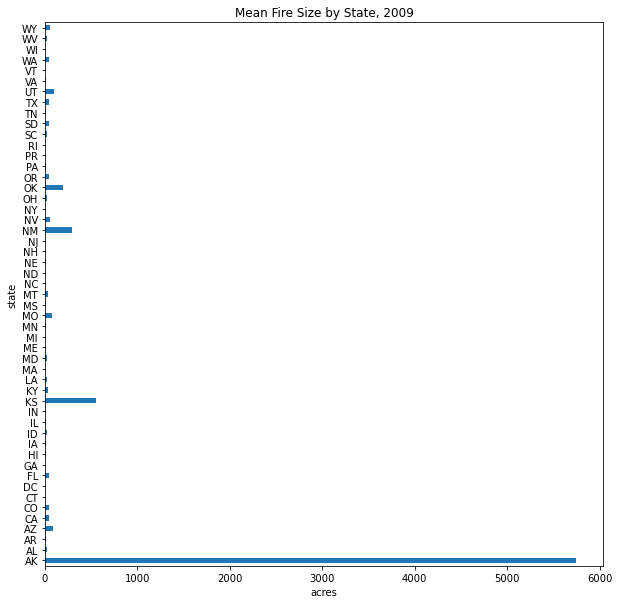

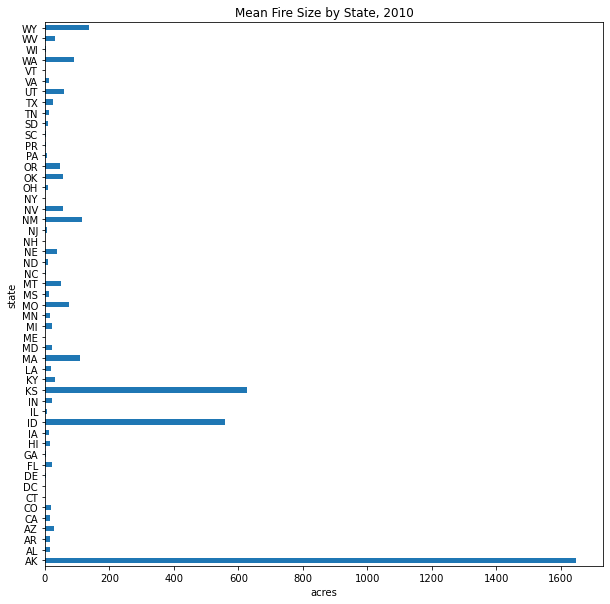

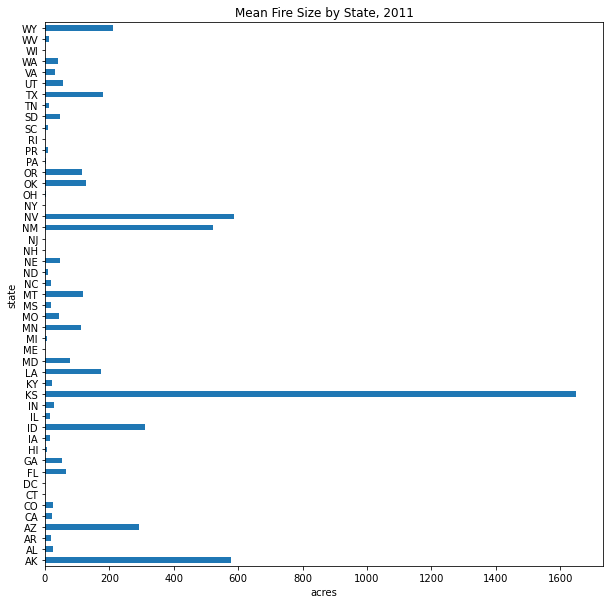

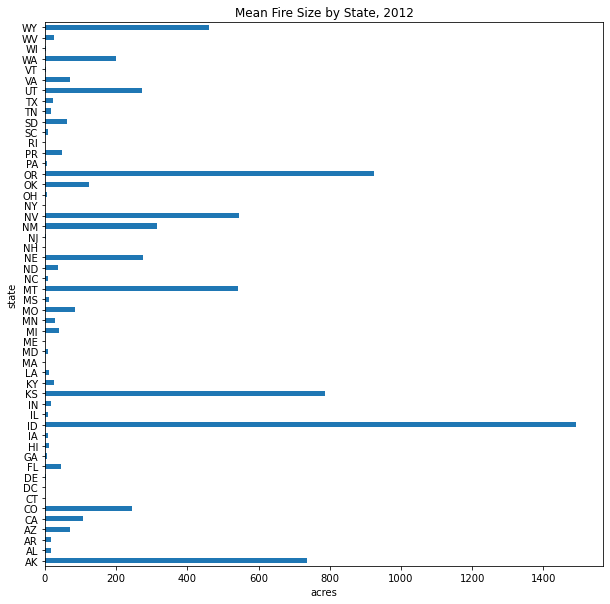

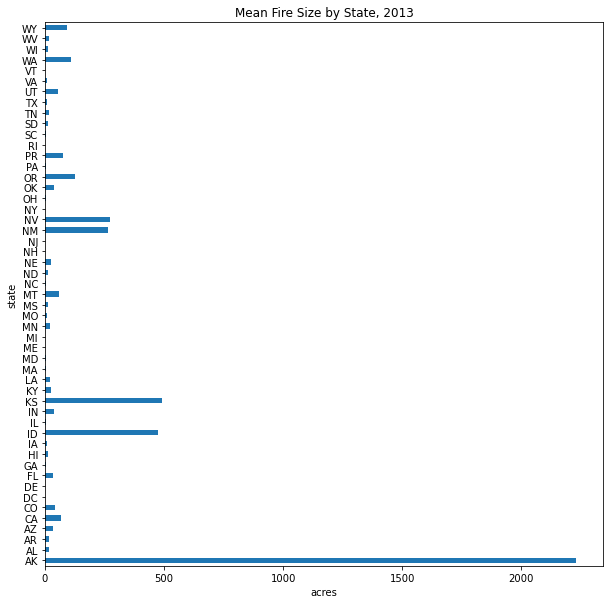

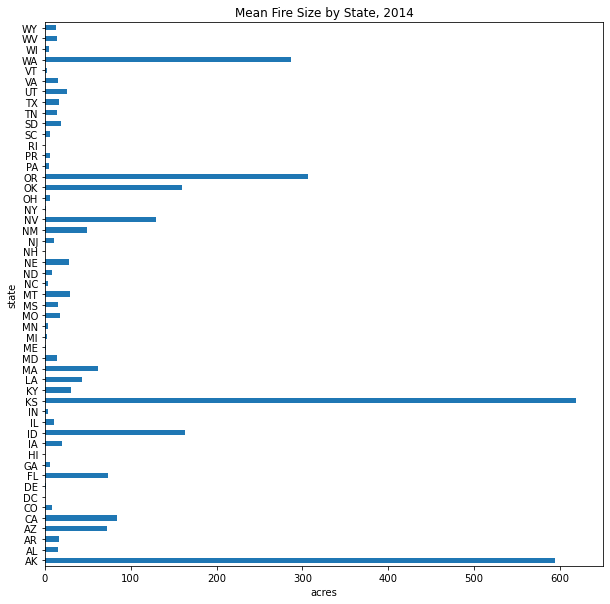

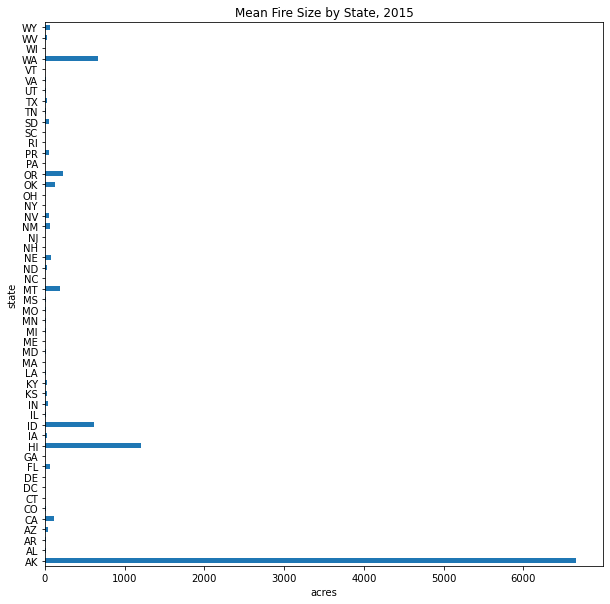

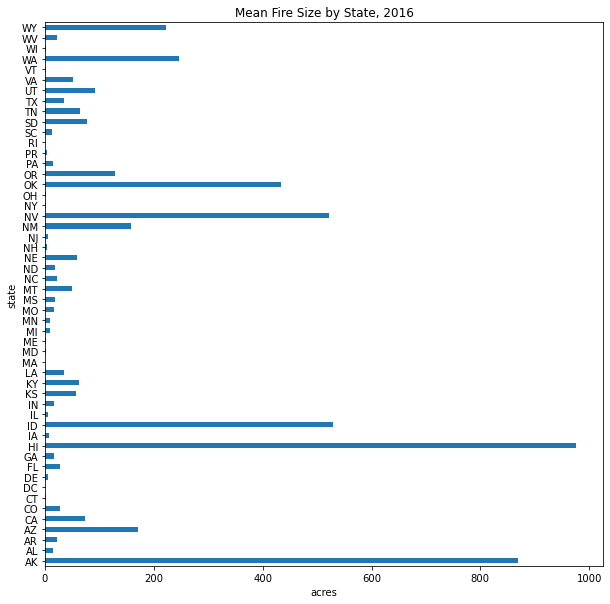

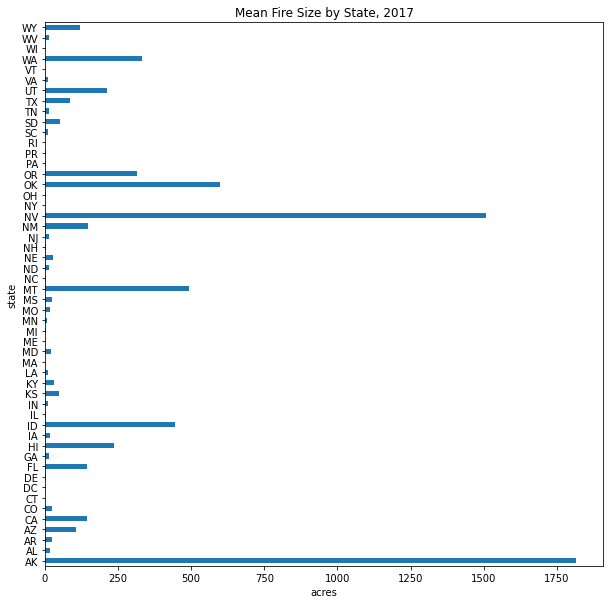

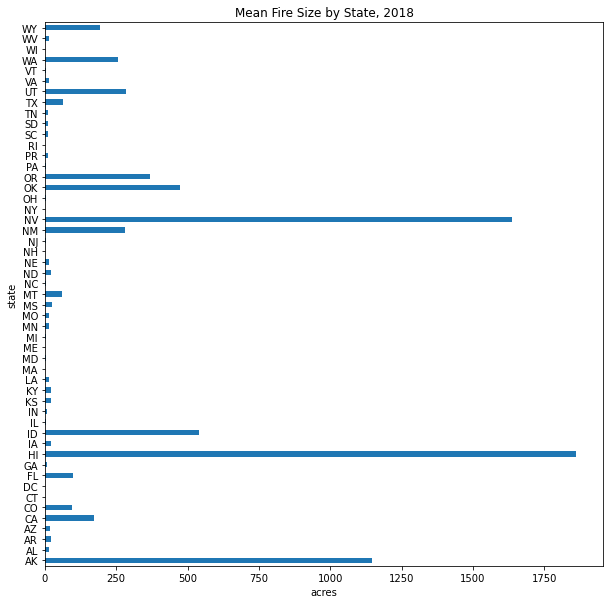

In [51]:
# view mean fire size by state for each year
for year in list(range(1992,2019)):
    plt.figure(figsize=(10,10))
    fires[fires.fire_year == year].groupby('state').fire_size.mean().plot.barh().set(title=f'Mean Fire Size by State, {year}', xlabel='acres')
    plt.show();

[Text(0.5, 1.0, 'Median Fire Size by State'), Text(0.5, 0, 'acres')]

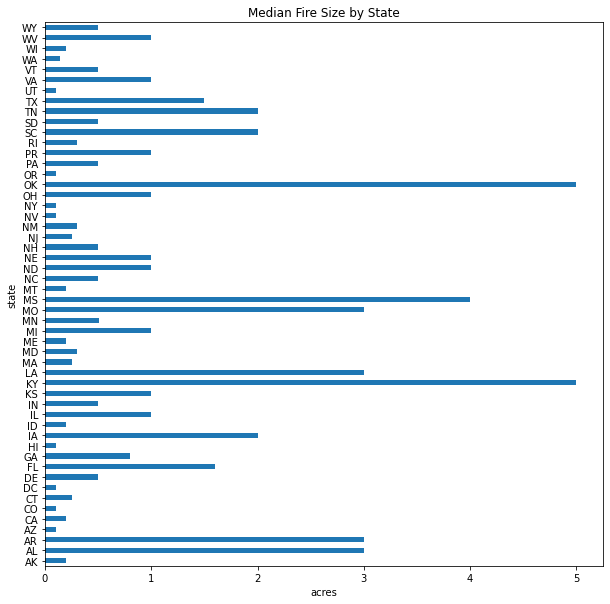

In [44]:
# view overall median fire size by state
plt.figure(figsize=(10,10))
fires.groupby('state').fire_size.median().plot.barh().set(title='Median Fire Size by State', xlabel='acres')

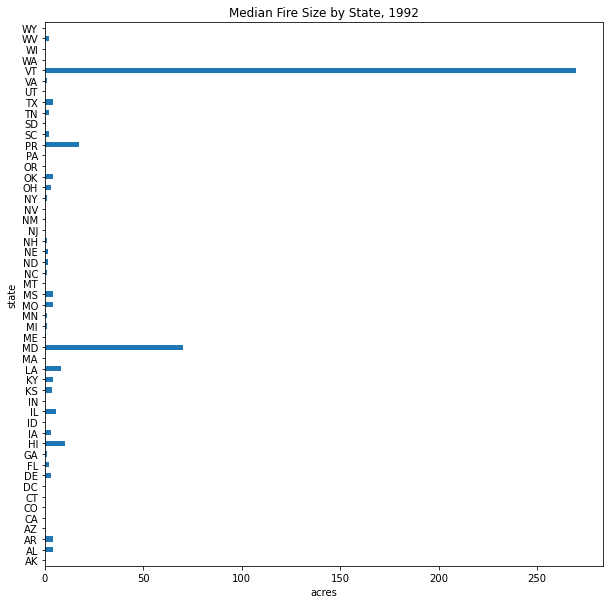

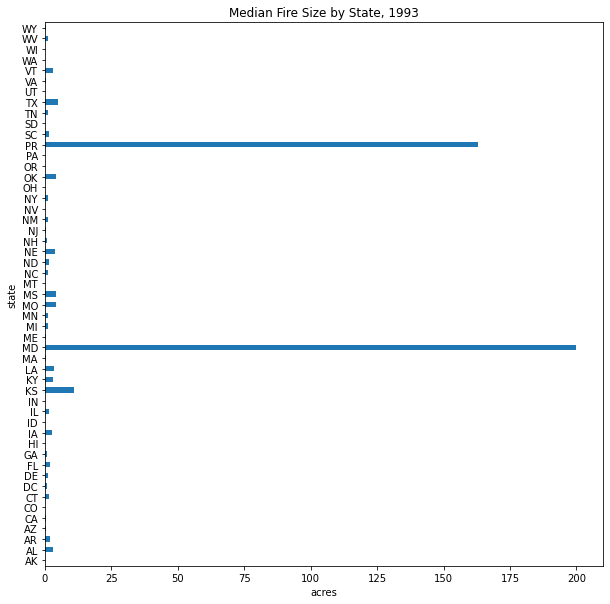

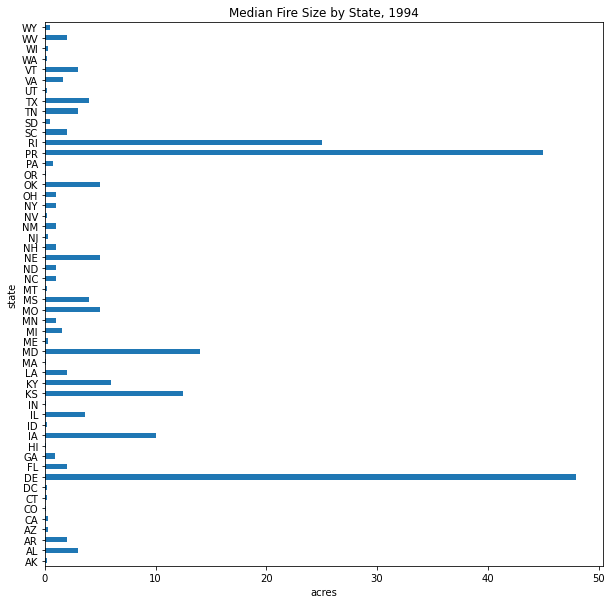

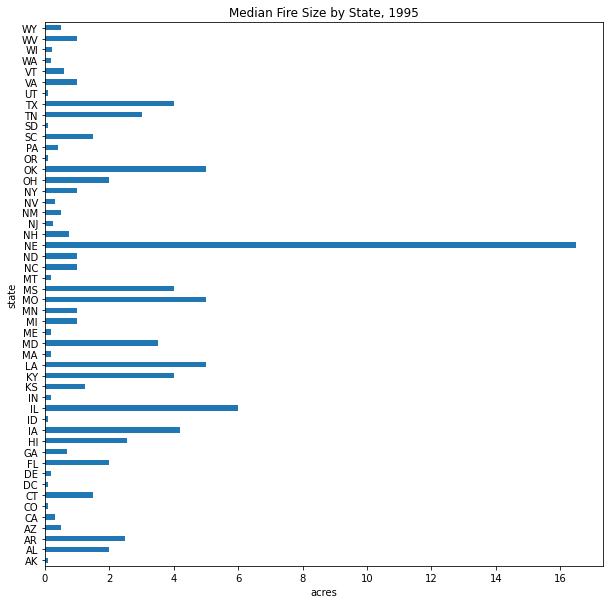

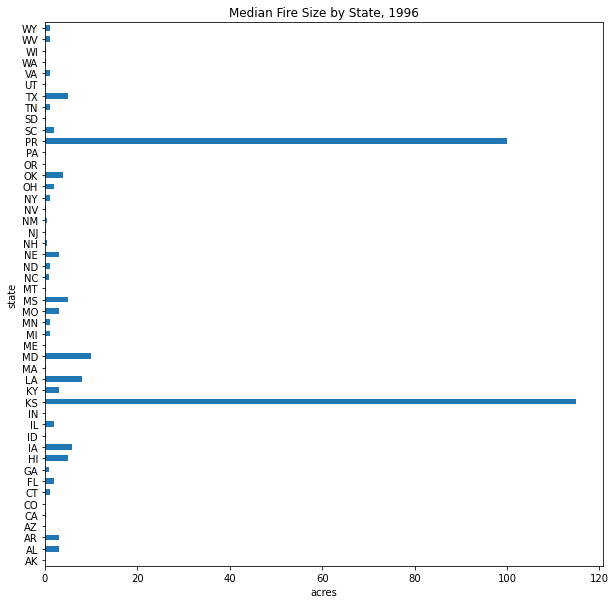

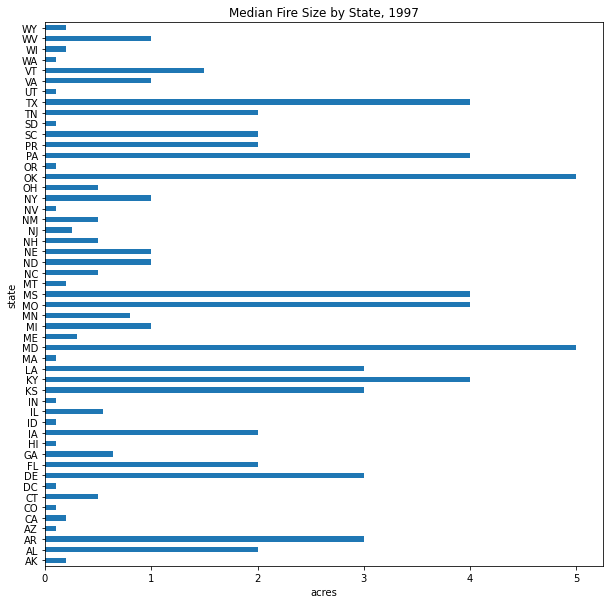

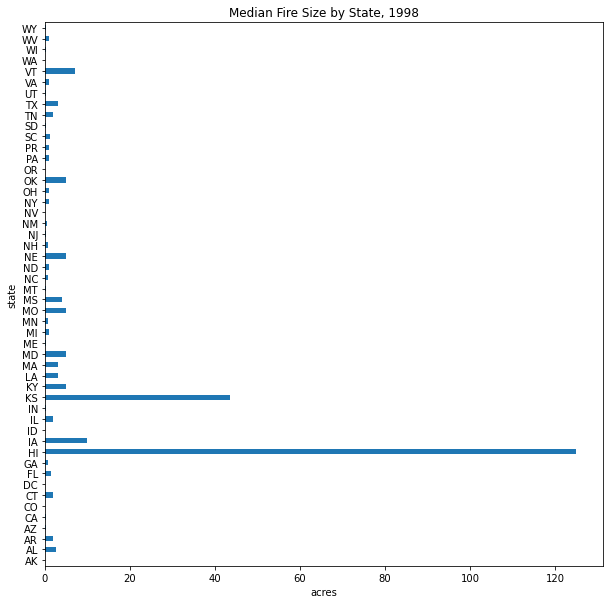

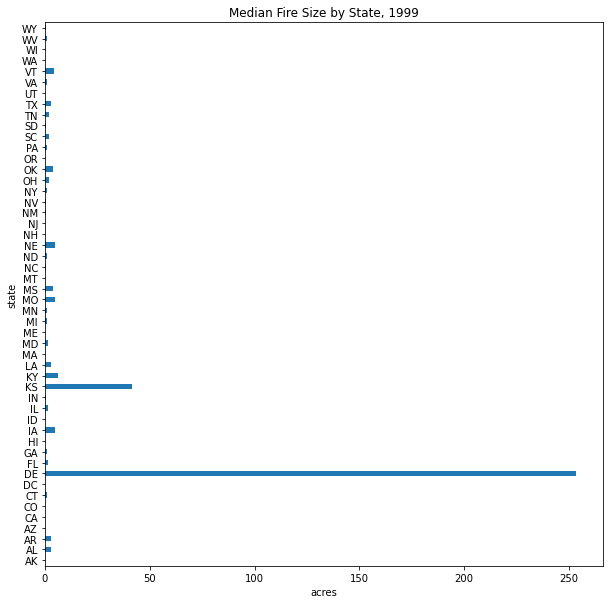

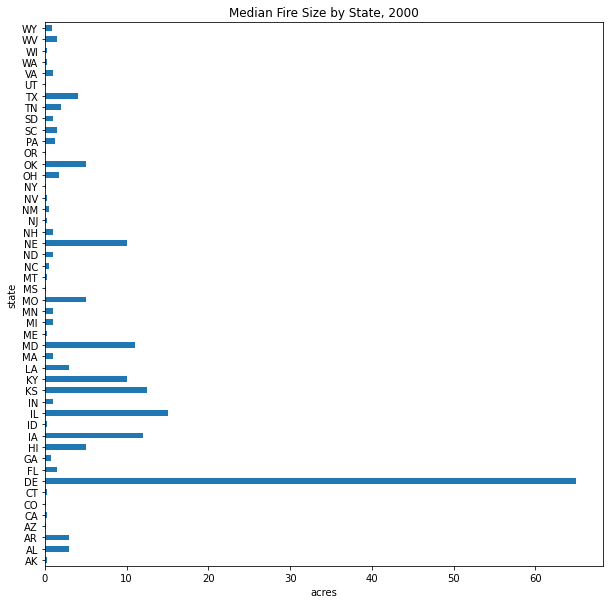

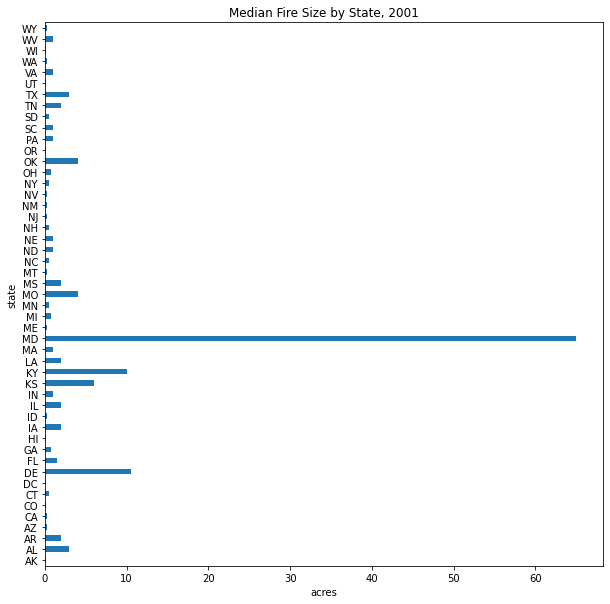

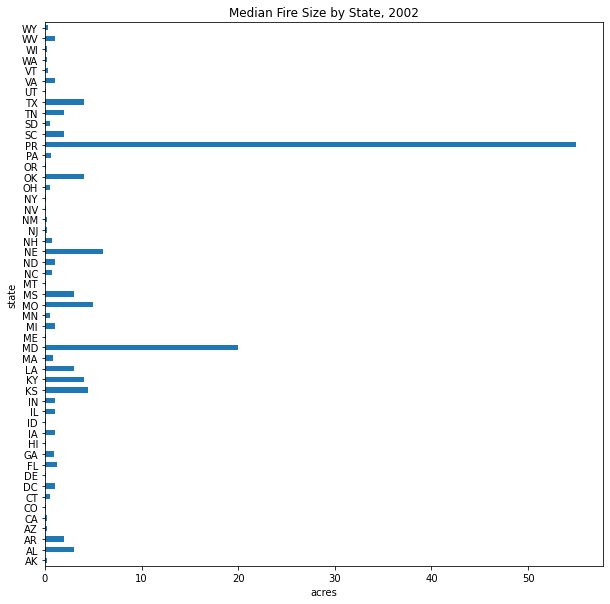

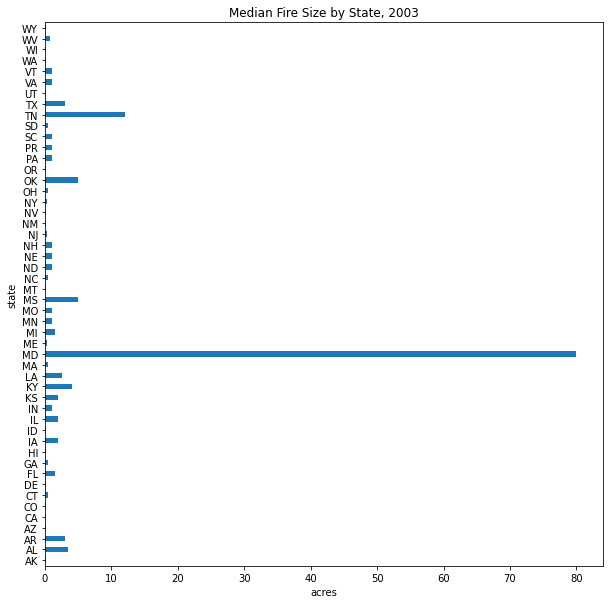

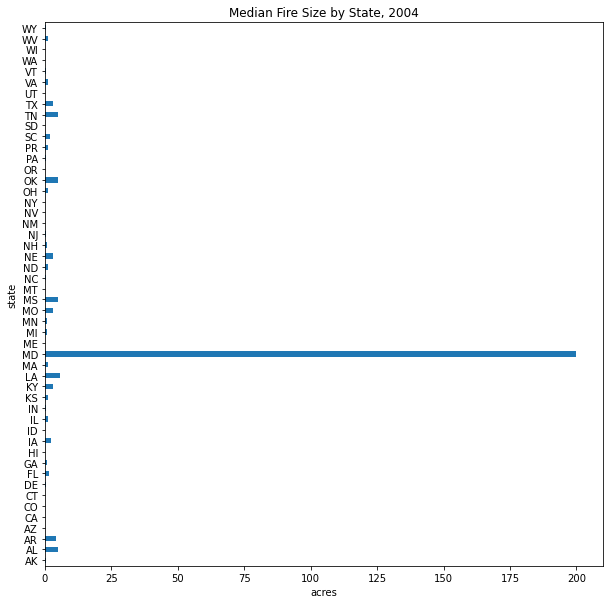

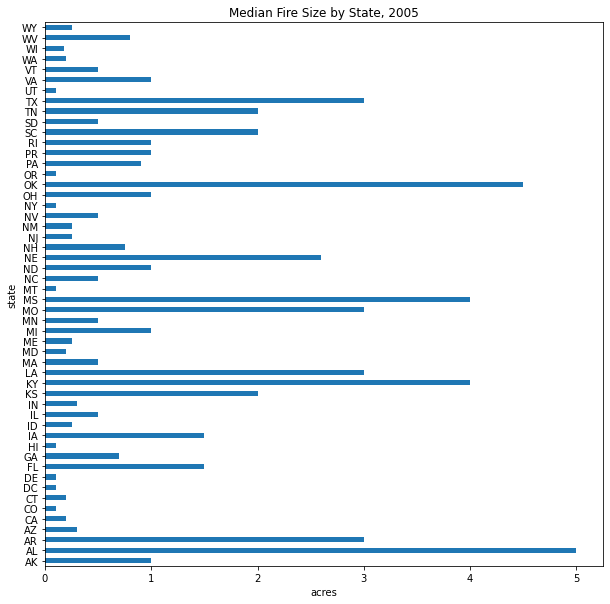

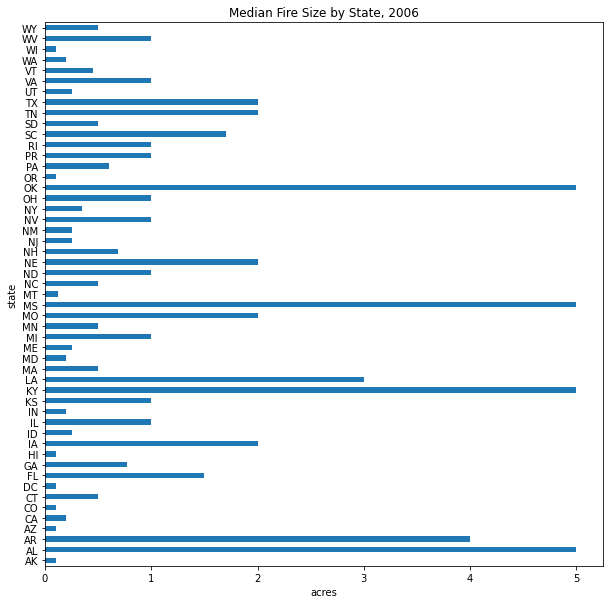

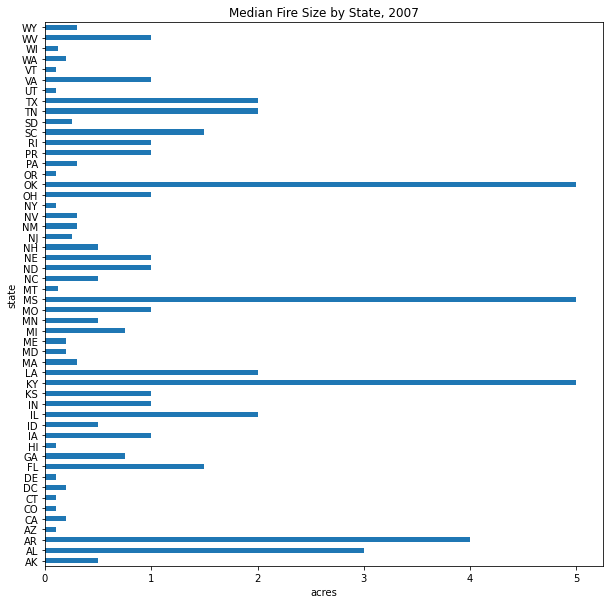

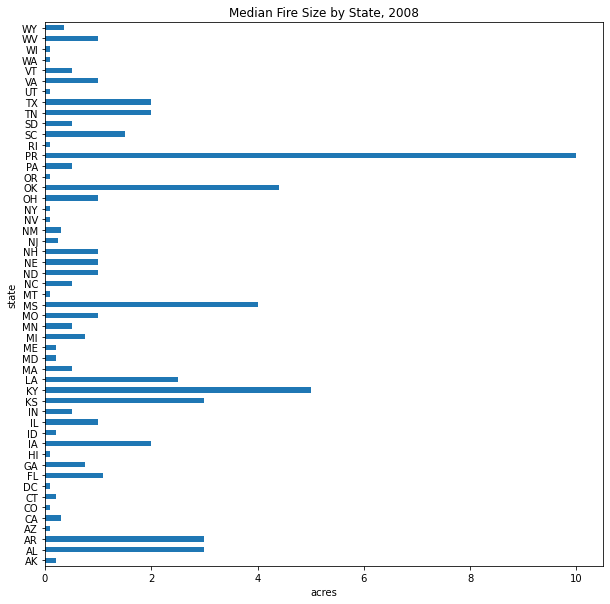

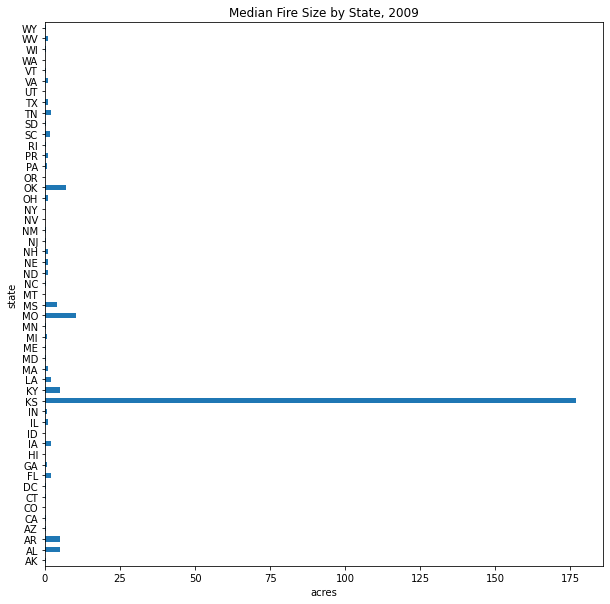

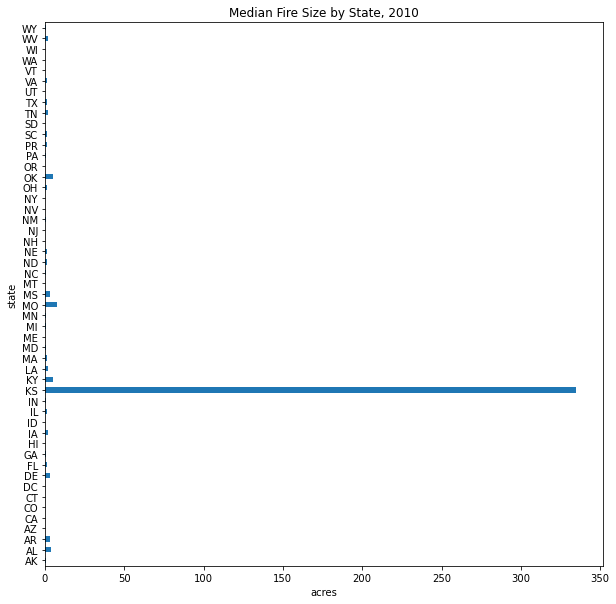

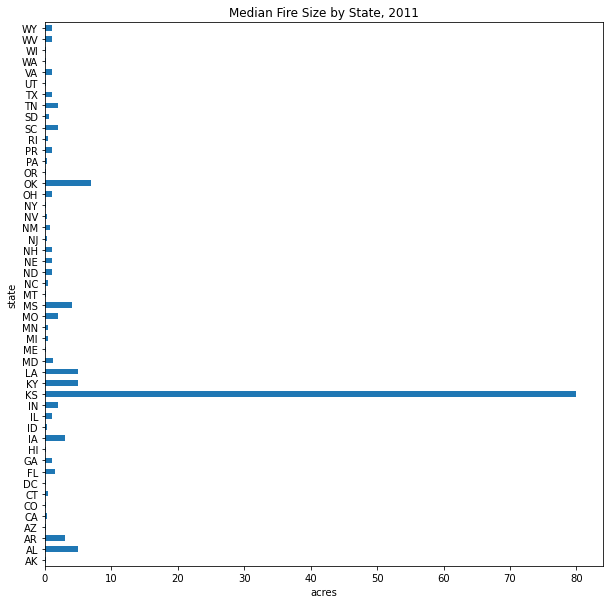

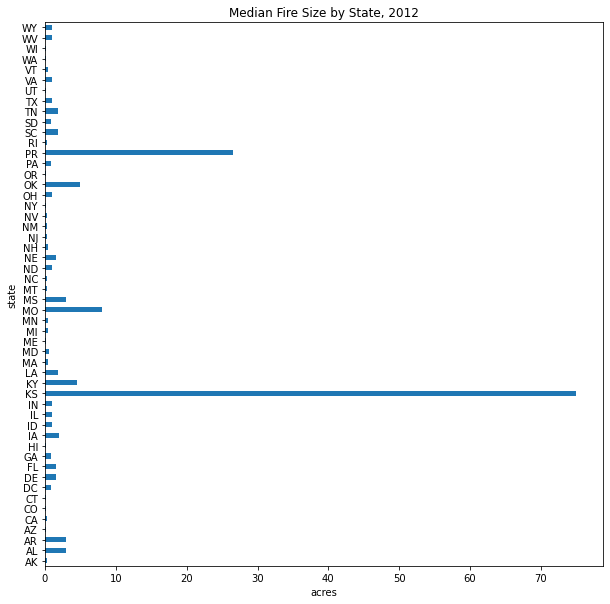

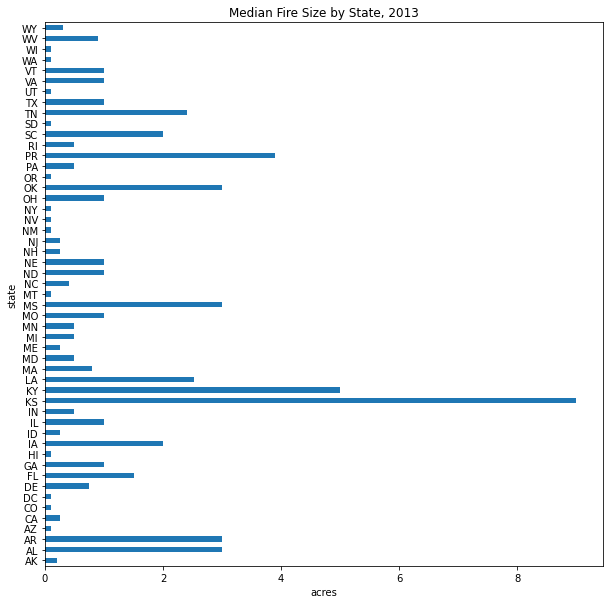

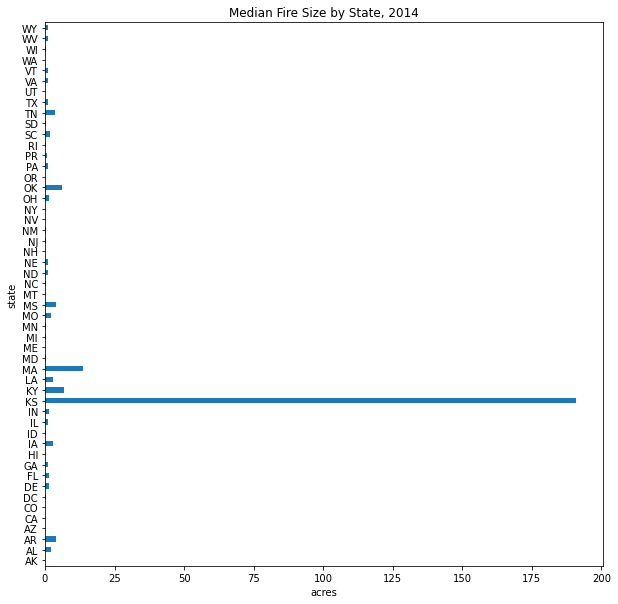

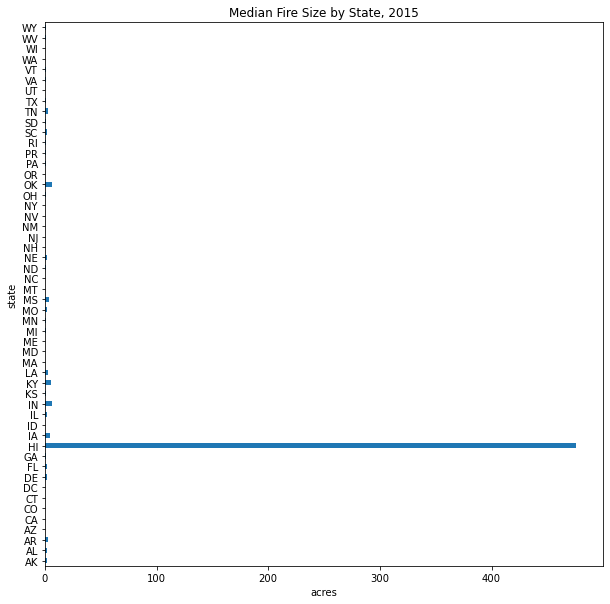

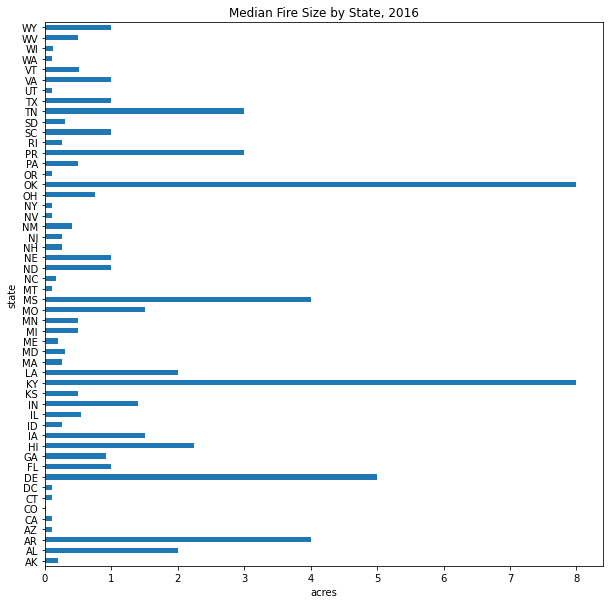

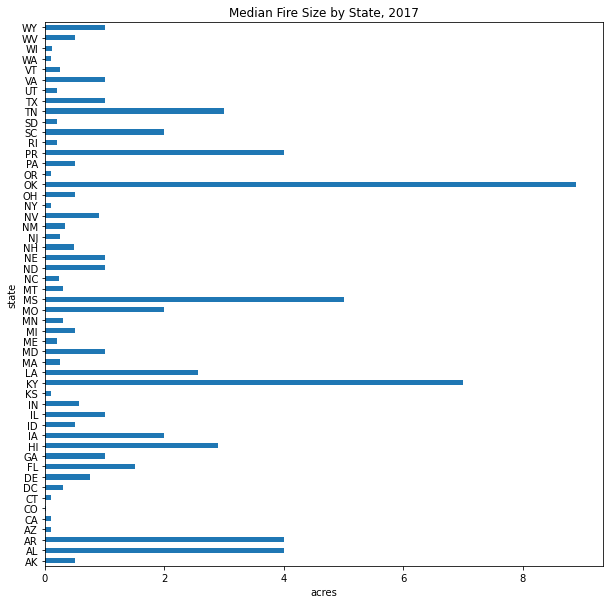

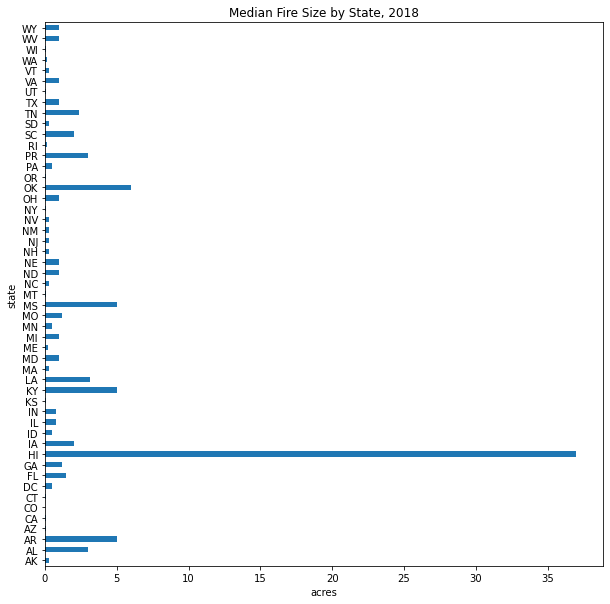

In [50]:
# view median fire size by state for each year
for year in list(range(1992,2019)):
    plt.figure(figsize=(10,10))
    fires[fires.fire_year == year].groupby('state').fire_size.median().plot.barh().set(title=f'Median Fire Size by State, {year}', xlabel='acres')
    plt.show();

I want to look at the full, original dataframe again to see if we can use any fire name or fire_class_size data for our storytelling or visualizations.

In [110]:
#Remove Limits On Viewing Dataframes
pd.set_option('display.max_columns', None)

In [108]:
# pull original fires df
og_fire_df = pd.read_csv('fires.csv', index_col=0)
og_fire_df

,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,...,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,1,...,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County
1,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,...,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County
2,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,27,...,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County
3,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,43,...,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3.0,6003.0,Alpine County
4,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,44,...,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3.0,6003.0,Alpine County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166748,400482078,ICS209_2016_4363266,INTERAGCY,IA-ICS209,ST/C&L,USTNTNS,Tennessee Division of Forestry,TNTNS,Tennessee Division of Forestry,NaN,...,NaN,125.00,D,36.431667,-84.421667,PRIVATE,TN,Scott,47151.0,Scott County
2166749,400482080,ICS209_2016_4433939,INTERAGCY,IA-ICS209,ST/C&L,USALALS,Alabama Forestry Commission,ALALS,Alabama Forestry Commission,NaN,...,NaN,120.00,D,31.143611,-88.111944,PRIVATE,AL,Washington,1129.0,Washington County
2166750,400482083,ICS209_2017_7335143,INTERAGCY,IA-ICS209,ST/C&L,USALALS,Alabama Forestry Commission,ALALS,Alabama Forestry Commission,NaN,...,NaN,120.00,D,33.920000,-85.310000,PRIVATE,AL,Cleburne,1029.0,Cleburne County
2166751,400482085,ICS209_2017_7186124,INTERAGCY,IA-ICS209,FS,USAROUF,Ouachita National Forest,AROUF,Ouachita National Forest,NaN,...,NaN,110.00,D,34.640000,-93.400000,USFS,AR,Garland,5051.0,Garland County


In [111]:
# look at biggest fire
og_fire_df[og_fire_df.FIRE_SIZE == og_fire_df.FIRE_SIZE.max()]

,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_PLUS_INCIDENT_JOIN_ID,ICS_209_PLUS_COMPLEX_JOIN_ID,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
2042982,400217728,ICS209_2017_7145623,INTERAGCY,IA-ICS209,ST/C&L,USOKOKS,Oklahoma Division of Forestry,OKOKS,Oklahoma Division of Forestry,NaN,000527,KWV0,OKS - STARBUCK,2017_7145623_OKS - STARBUCK,2017_7155675_NW OKLAHOMA COMPLEX,OK3677410017520170307,OKS - STARBUCK,NW OKLAHOMA COMPLEX,2017,3/7/2017 0:00,66,1237.0,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaN,NaN,NaN,NaN,662700.0,G,36.77447,-100.1752,MISSING/NOT SPECIFIED,OK,Beaver County,40007.0,Beaver County


In [112]:
# look at data for named fires
og_fire_df[og_fire_df.FIRE_NAME.notnull()]

,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_PLUS_INCIDENT_JOIN_ID,ICS_209_PLUS_COMPLEX_JOIN_ID,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,NaN,NaN,NaN,NaN,NaN,2005,2/2/2005 0:00,33,1300.0,Human,Power generation/transmission/distribution,NaN,2/2/2005 0:00,33.0,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County
1,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,13,AAC0,PIGEON,NaN,NaN,NaN,NaN,NaN,2004,5/12/2004 0:00,133,845.0,Natural,Natural,NaN,5/12/2004 0:00,133.0,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County
2,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,27,021,A32W,SLACK,NaN,NaN,NaN,NaN,NaN,2004,5/31/2004 0:00,152,1921.0,Human,Debris and open burning,NaN,5/31/2004 0:00,152.0,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County
3,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,43,6,NaN,DEER,NaN,NaN,NaN,NaN,NaN,2004,6/28/2004 0:00,180,1600.0,Natural,Natural,NaN,7/3/2004 0:00,185.0,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3.0,6003.0,Alpine County
4,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,44,7,NaN,STEVENOT,NaN,NaN,NaN,NaN,NaN,2004,6/28/2004 0:00,180,1600.0,Natural,Natural,NaN,7/3/2004 0:00,185.0,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3.0,6003.0,Alpine County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166748,400482078,ICS209_2016_4363266,INTERAGCY,IA-ICS209,ST/C&L,USTNTNS,Tennessee Division of Forestry,TNTNS,Tennessee Division of Forestry,NaN,ED0021,NaN,BUFFALO ROAD,2016_4363266_BUFFALO ROAD,NaN,NaN,NaN,NaN,2016,10/18/2016 0:00,292,1115.0,Human,Missing data/not specified/undetermined,NaN,NaN,NaN,NaN,125.00,D,36.431667,-84.421667,PRIVATE,TN,Scott,47151.0,Scott County
2166749,400482080,ICS209_2016_4433939,INTERAGCY,IA-ICS209,ST/C&L,USALALS,Alabama Forestry Commission,ALALS,Alabama Forestry Commission,NaN,2016102216,NaN,LITTLE CHESTANE,2016_4433939_LITTLE CHESTANE,NaN,NaN,NaN,NaN,2016,10/22/2016 0:00,296,1159.0,Human,Missing data/not specified/undetermined,NaN,NaN,NaN,NaN,120.00,D,31.143611,-88.111944,PRIVATE,AL,Washington,1129.0,Washington County
2166750,400482083,ICS209_2017_7335143,INTERAGCY,IA-ICS209,ST/C&L,USALALS,Alabama Forestry Commission,ALALS,Alabama Forestry Commission,NaN,201704025,NaN,CAMPER,2017_7335143_CAMPER,NaN,NaN,NaN,NaN,2017,4/2/2017 0:00,92,1259.0,Human,Missing data/not specified/undetermined,NaN,NaN,NaN,NaN,120.00,D,33.920000,-85.310000,PRIVATE,AL,Cleburne,1029.0,Cleburne County
2166751,400482085,ICS209_2017_7186124,INTERAGCY,IA-ICS209,FS,USAROUF,Ouachita National Forest,AROUF,Ouachita National Forest,NaN,001201,LH4Z,PENINSULA,2017_7186124_PENINSULA,NaN,NaN,NaN,NaN,2017,11/30/2017 0:00,334,1432.0,Human,Missing data/not specified/undetermined,NaN,NaN,NaN,NaN,110.00,D,34.640000,-93.400000,USFS,AR,Garland,5051.0,Garland County


In [113]:
# see how much data is left with non-null fire names and containment dates
og_fire_df[og_fire_df.FIRE_NAME.notnull() & og_fire_df.CONT_DATE.notnull()]

,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_PLUS_INCIDENT_JOIN_ID,ICS_209_PLUS_COMPLEX_JOIN_ID,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,NaN,NaN,NaN,NaN,NaN,2005,2/2/2005 0:00,33,1300.0,Human,Power generation/transmission/distribution,NaN,2/2/2005 0:00,33.0,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County
1,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,13,AAC0,PIGEON,NaN,NaN,NaN,NaN,NaN,2004,5/12/2004 0:00,133,845.0,Natural,Natural,NaN,5/12/2004 0:00,133.0,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County
2,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,27,021,A32W,SLACK,NaN,NaN,NaN,NaN,NaN,2004,5/31/2004 0:00,152,1921.0,Human,Debris and open burning,NaN,5/31/2004 0:00,152.0,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County
3,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,43,6,NaN,DEER,NaN,NaN,NaN,NaN,NaN,2004,6/28/2004 0:00,180,1600.0,Natural,Natural,NaN,7/3/2004 0:00,185.0,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3.0,6003.0,Alpine County
4,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,44,7,NaN,STEVENOT,NaN,NaN,NaN,NaN,NaN,2004,6/28/2004 0:00,180,1600.0,Natural,Natural,NaN,7/3/2004 0:00,185.0,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3.0,6003.0,Alpine County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166694,400481851,SFO-2018CT_CTS160-2018-0001,NONFED,ST-NASF,ST/C&L,USCTCTS,Connecticut Division of Forestry,CTCTS,Connecticut Division of Forestry,NaN,160-2018-0001,NaN,TURNPIKE RD/BALAZS RD,NaN,NaN,NaN,NaN,NaN,2018,11/17/2018 0:00,321,1035.0,Human,Missing data/not specified/undetermined,NaN,11/17/2018 0:00,321.0,1052.0,0.10,A,41.885375,-72.261468,MUNICIPAL/LOCAL,CT,Tolland,9013.0,Tolland County
2166695,400481852,SFO-2018CT_CTS129-2018-0001,NONFED,ST-NASF,ST/C&L,USCTCTS,Connecticut Division of Forestry,CTCTS,Connecticut Division of Forestry,NaN,129-2018-0001,NaN,21 PLYMOUTH ROAD,NaN,NaN,NaN,NaN,NaN,2018,12/12/2018 0:00,346,1627.0,Human,Missing data/not specified/undetermined,NaN,12/12/2018 0:00,346.0,1657.0,0.10,A,41.985374,-72.446195,PRIVATE,CT,Tolland,9013.0,Tolland County
2166696,400481854,SFO-2018CT_CTS038-2018-0002,NONFED,ST-NASF,ST/C&L,USCTCTS,Connecticut Division of Forestry,CTCTS,Connecticut Division of Forestry,NaN,038-2018-0002,NaN,257 STAGECOACH ROAD,NaN,NaN,NaN,NaN,NaN,2018,4/16/2018 0:00,106,555.0,Human,Debris and open burning,NaN,4/16/2018 0:00,106.0,620.0,0.10,A,41.459430,-72.662758,PRIVATE,CT,Middlesex,9007.0,Middlesex County
2166697,400481855,SFO-2018CT_CTS026-2018-0001,NONFED,ST-NASF,ST/C&L,USCTCTS,Connecticut Division of Forestry,CTCTS,Connecticut Division of Forestry,NaN,026-2018-0001,NaN,KINGS HWY AND GOOSE HILL RD,NaN,NaN,NaN,NaN,NaN,2018,4/23/2018 0:00,113,1228.0,Human,Missing data/not specified/undetermined,NaN,4/23/2018 0:00,113.0,1308.0,0.10,A,41.435494,-72.359669,PRIVATE,CT,Middlesex,9007.0,Middlesex County


In [114]:
# view nulls per column
og_fire_df.isna().sum()

FOD_ID                                 0
FPA_ID                                 0
SOURCE_SYSTEM_TYPE                     0
SOURCE_SYSTEM                          0
NWCG_REPORTING_AGENCY                  0
NWCG_REPORTING_UNIT_ID                 0
NWCG_REPORTING_UNIT_NAME               0
SOURCE_REPORTING_UNIT                  0
SOURCE_REPORTING_UNIT_NAME             0
LOCAL_FIRE_REPORT_ID             1701854
LOCAL_INCIDENT_ID                 734948
FIRE_CODE                        1797127
FIRE_NAME                         960596
ICS_209_PLUS_INCIDENT_JOIN_ID    2135993
ICS_209_PLUS_COMPLEX_JOIN_ID     2165833
MTBS_ID                          2153848
MTBS_FIRE_NAME                   2153848
COMPLEX_NAME                     2161081
FIRE_YEAR                              0
DISCOVERY_DATE                         0
DISCOVERY_DOY                          0
DISCOVERY_TIME                    754468
NWCG_CAUSE_CLASSIFICATION              1
NWCG_GENERAL_CAUSE                     0
NWCG_CAUSE_AGE_C

In [115]:
# view shape of og df
og_fire_df.shape

(2166753, 37)

In [118]:
# bring in fire names and fire size class to working fires df
fires = pd.merge(fires, og_fire_df[['FIRE_SIZE_CLASS', 'FIRE_NAME']], left_index=True, right_index=True)
fires.columns = fires.columns.str.lower()
fires

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,pct_state_burned,fire_size_class,fire_name
0,2005,2005-02-02,Power generation/transmission/distribution,2005-02-02,0.10,40.036944,-121.005833,CA,101676000.0,9.835000e-08,A,FOUNTAIN
1,2004,2004-05-12,Natural,2004-05-12,0.25,38.933056,-120.404444,CA,101676000.0,2.458800e-07,A,PIGEON
2,2004,2004-05-31,Debris and open burning,2004-05-31,0.10,38.984167,-120.735556,CA,101676000.0,9.835000e-08,A,SLACK
3,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.913333,CA,101676000.0,9.835000e-08,A,DEER
4,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.933056,CA,101676000.0,9.835000e-08,A,STEVENOT
...,...,...,...,...,...,...,...,...,...,...,...,...
2166748,2016,2016-10-18,Missing data/not specified/undetermined,NaT,125.00,36.431667,-84.421667,TN,26973000.0,4.634264e-04,D,BUFFALO ROAD
2166749,2016,2016-10-22,Missing data/not specified/undetermined,NaT,120.00,31.143611,-88.111944,AL,33432000.0,3.589375e-04,D,LITTLE CHESTANE
2166750,2017,2017-04-02,Missing data/not specified/undetermined,NaT,120.00,33.920000,-85.310000,AL,33432000.0,3.589375e-04,D,CAMPER
2166751,2017,2017-11-30,Missing data/not specified/undetermined,NaT,110.00,34.640000,-93.400000,AR,34036000.0,3.231872e-04,D,PENINSULA


In [119]:
# view value counts for fire size class
fires.fire_size_class.value_counts()

B    1047772
A     810694
C     246247
D      32261
E      16227
F       9097
G       4455
Name: fire_size_class, dtype: int64

In [120]:
# create column for how long fire burned uncontained
fires['days_uncontrolled'] = fires.containment_date-fires.discovery_date
fires

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,pct_state_burned,fire_size_class,fire_name,days_uncontrolled
0,2005,2005-02-02,Power generation/transmission/distribution,2005-02-02,0.10,40.036944,-121.005833,CA,101676000.0,9.835000e-08,A,FOUNTAIN,0 days
1,2004,2004-05-12,Natural,2004-05-12,0.25,38.933056,-120.404444,CA,101676000.0,2.458800e-07,A,PIGEON,0 days
2,2004,2004-05-31,Debris and open burning,2004-05-31,0.10,38.984167,-120.735556,CA,101676000.0,9.835000e-08,A,SLACK,0 days
3,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.913333,CA,101676000.0,9.835000e-08,A,DEER,5 days
4,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.933056,CA,101676000.0,9.835000e-08,A,STEVENOT,5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166748,2016,2016-10-18,Missing data/not specified/undetermined,NaT,125.00,36.431667,-84.421667,TN,26973000.0,4.634264e-04,D,BUFFALO ROAD,NaT
2166749,2016,2016-10-22,Missing data/not specified/undetermined,NaT,120.00,31.143611,-88.111944,AL,33432000.0,3.589375e-04,D,LITTLE CHESTANE,NaT
2166750,2017,2017-04-02,Missing data/not specified/undetermined,NaT,120.00,33.920000,-85.310000,AL,33432000.0,3.589375e-04,D,CAMPER,NaT
2166751,2017,2017-11-30,Missing data/not specified/undetermined,NaT,110.00,34.640000,-93.400000,AR,34036000.0,3.231872e-04,D,PENINSULA,NaT


In [121]:
# view longest uncontrolled fire
fires.days_uncontrolled.max()

Timedelta('36159 days 00:00:00')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

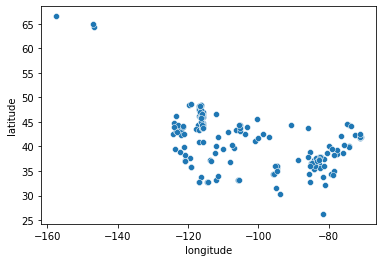

In [128]:
# plot fires uncontrolled for over a year
sns.scatterplot(data=fires[fires.days_uncontrolled > '365 days'], x='longitude', y='latitude')

In [130]:
# view fires burning uncontained longer than 2 years
fires[fires.days_uncontrolled > '730 days']

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,pct_state_burned,fire_size_class,fire_name,days_uncontrolled
186190,1998,1998-07-27,Arson/incendiarism,2002-07-27,0.10,44.34940,-90.75990,WI,35933000.0,2.783000e-07,A,HOCHUNK 3,1461 days
294159,2006,2006-06-15,Natural,2009-06-15,0.50,33.16340,-105.74690,NM,77823000.0,6.424800e-07,B,FOREST DRIVE,1096 days
294160,2006,2006-06-15,Natural,2009-06-15,0.30,33.25650,-105.73420,NM,77823000.0,3.854900e-07,B,NAICHE,1096 days
294161,2006,2006-06-23,Natural,2009-06-24,0.30,33.24700,-105.61330,NM,77823000.0,3.854900e-07,B,WHITETAIL SUMMIT,1097 days
305182,2001,2001-06-11,Natural,2004-06-16,100.00,66.56610,-157.51940,AK,393747000.0,2.539702e-05,D,KILIOVILIK,1101 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123834,2005,2005-09-26,Recreation and ceremony,2010-08-03,0.10,45.08393,-116.32826,ID,53487000.0,1.869600e-07,A,SCHOOL HOUSE,1772 days
2123836,2005,2005-08-12,Natural,2010-07-30,0.25,46.53424,-116.12223,ID,53487000.0,4.674000e-07,A,HUCKLEBERRY,1813 days
2124091,2005,2005-08-01,Natural,2009-08-30,0.10,44.39039,-115.99127,ID,53487000.0,1.869600e-07,A,CLEAR CREEK,1490 days
2124092,2005,2005-07-19,Equipment and vehicle use,2010-09-20,0.10,45.78468,-116.33390,ID,53487000.0,1.869600e-07,A,ALMOST ELMER,1889 days


In [136]:
fires[(fires.state_size > 5000000) & (fires.state_size < 6000000)]

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,pct_state_burned,fire_size_class,fire_name,days_uncontrolled
5810,2005,2005-05-11,Missing data/not specified/undetermined,2005-05-11,0.500,44.083333,-71.450000,NH,5941000.0,8.416090e-06,B,BARTLETT TURNOUT,0 days
15213,2006,2006-04-21,Railroad operations and maintenance,2006-04-22,100.000,44.716667,-71.283333,NH,5941000.0,1.683218e-03,D,CASCADE,1 days
16061,2006,2006-07-10,Recreation and ceremony,2006-07-10,0.100,44.400000,-71.400000,NH,5941000.0,1.683220e-06,A,SETHBRENDAN FIRE,0 days
16471,2006,2006-04-30,Recreation and ceremony,2006-04-30,2.000,44.411389,-71.511389,NH,5941000.0,3.366437e-05,B,JEFFERSON,0 days
16649,2006,2006-09-01,Recreation and ceremony,2006-09-01,0.010,44.100000,-71.233333,NH,5941000.0,1.683200e-07,A,STILLINGS ROAD,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111346,2018,2018-05-09,Missing data/not specified/undetermined,NaT,1.500,43.140000,-72.383410,NH,5941000.0,2.524827e-05,B,NaN,NaT
2111347,2018,2018-09-03,Missing data/not specified/undetermined,NaT,0.022,43.174541,-72.442492,NH,5941000.0,3.703100e-07,A,NaN,NaT
2111750,2018,2018-04-24,Missing data/not specified/undetermined,NaT,0.010,44.607920,-71.218760,NH,5941000.0,1.683200e-07,A,NaN,NaT
2118723,2018,2018-04-22,Missing data/not specified/undetermined,NaT,843.000,39.740000,-74.490000,NJ,5258000.0,1.603271e-02,E,BREECHES BRANCH FIRE,NaT
